# Nama: Belinda Mutiara
### NIM: 2540119696 |  Kelas: LA09


# Link Video Jawaban
https://drive.google.com/drive/folders/1iIxpxIgVLqB1G-cWYxDCVfliwRd05f-k?usp=sharing 

# About Dataset

<p><b>age</b>: Age of policyholder </p>
<p><b>sex</b>: Gender of policy holder (female=0, male=1) </p>
<p><b>bmi</b>: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 25 </p>
<p><b>steps</b>: average walking steps per day of policyholder </p>
<p><b>children</b>: number of children / dependents of policyholder </p>
<p><b>smoker</b>: Smoker / Non - smoker</p>
<p><b>region</b>: The residential area of policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3)</p>
<p><b>charges</b>: Individual medical costs billed by health insurance</p>
<b>insurace claim</b>: yes=1, no=0

# Importing Libraries

In [ ]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from sklearn.preprocessing import StandardScaler

from torch.utils.data import Dataset
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader 


Kode diatas digunakan untuk mengimport library yang aka digunakan untuk melakukan analisis, visualisasi, dan modelling data insurance.

# Nomor 1a

[LO 3, LO 4, 5 poin] Dataset yang diberikan memiliki beberapa problem, lakukan praproses
data untuk menyelesaikan problem dari data tersebut. Sebutkan problem apa saja yang kalian
temukan dari data yang diberikan, berikan penjelasan mengenai pendekatan apa yang kalian
gunakan dan kenapa memilih pendekatan yang dipilih?


Untuk mengetahui pre-processing apa saja yang dibutuhkan, harus terlebih dahulu melakukan eksplorasi data sehingga mengtahui permasalahan-permasalahan pada data ini.




## Data Overview

In [ ]:
#Mendifinikan variabel "data" yang membaca data csv berjudul "insurance.csv".

df = pd.read_csv('https://raw.githubusercontent.com/belindamutiara/dataset/6401c56165a7a929108f4ac88f44336a039ddc8e/insurance.csv')

In [ ]:
print(type(df))
row,column=df.shape

print("Jumlah baris data insurance adalah ", row)
print("Jumlah kolom data insurance adalah ", column)

<class 'pandas.core.frame.DataFrame'>
Jumlah baris data insurance adalah  1338
Jumlah kolom data insurance adalah  9


Data Insurance mempunyai 1338 baris, dan 9 kolom.

In [ ]:
print(df.columns.values)

['age' 'sex' 'bmi' 'steps' 'children' 'smoker' 'region' 'charges'
 'insuranceclaim']


Terdapat 9 kolom yaitu 'age' 'sex' 'bmi' 'steps' 'children' 'smoker' 'region' 'charges'
 'insuranceclaim'

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   steps           1338 non-null   int64  
 4   children        1338 non-null   int64  
 5   smoker          1338 non-null   int64  
 6   region          1338 non-null   int64  
 7   charges         1338 non-null   float64
 8   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


Setiap atribut memiliki 1338 observasi dengan dua tipe data yang berbeda: float dan integer

In [ ]:
df.head(5)
#Melihat 5 data teratas

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1


In [ ]:
df.tail(5)
# Melihat 5 data terbawah

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
1333,50,1,30.97,4008,3,0,1,10600.5483,0
1334,18,0,31.92,3003,0,0,0,2205.9808,1
1335,18,0,36.85,3008,0,0,2,1629.8335,1
1336,21,0,25.80,8009,0,0,3,2007.9450,0
1337,61,0,29.07,8008,0,1,1,29141.3603,1


## Checking Duplicate Data

In [ ]:
print(df.shape)
print(df[df.duplicated()].shape)

(1338, 9)
(0, 9)


In [ ]:
df[df.duplicated(keep=False)]

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim


Dataset terdiri dari 1338 observasi baris, dan 14 columns of data dan tidak memiliki duplikasi data

## Data Description

In [ ]:
categorical = df[["sex", "smoker", "region","insuranceclaim"]]
numeric = df[["age", "bmi", "steps", "children", "charges"]]

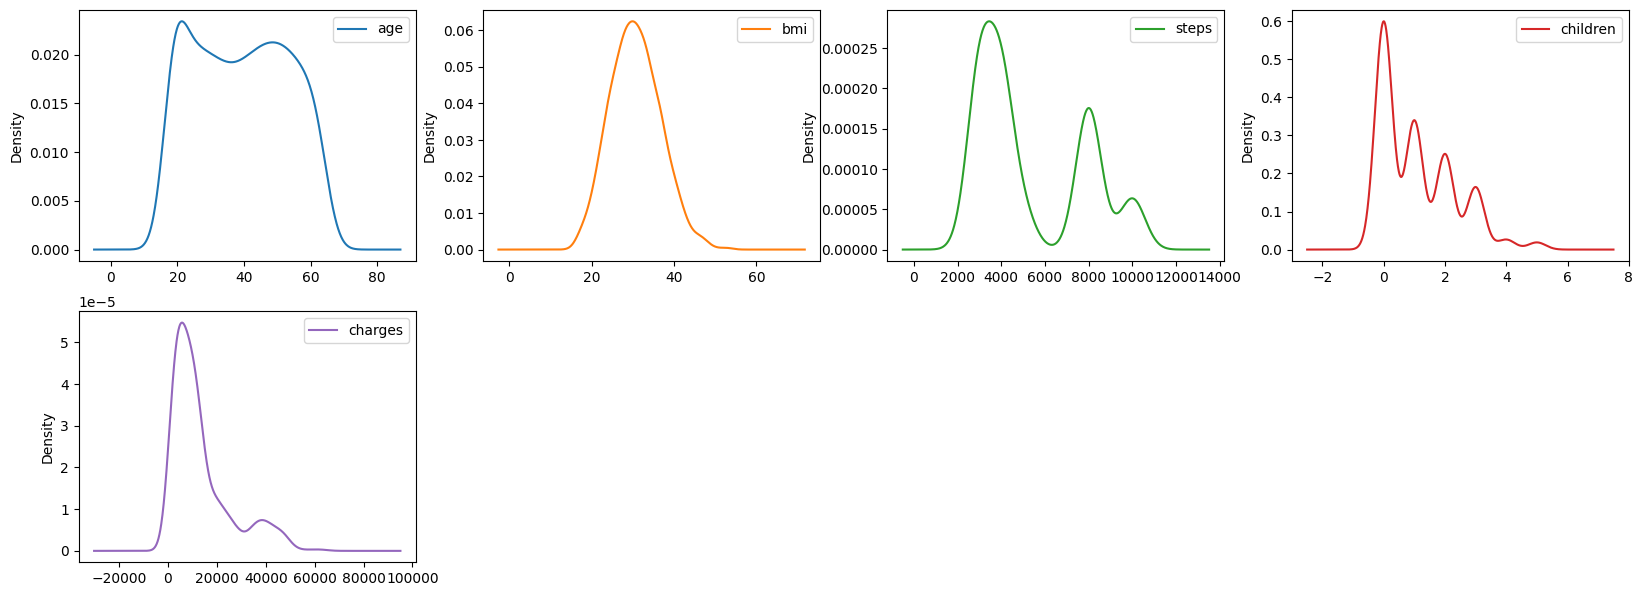

In [ ]:
# Density plots for all attributes to visualize the distribution of each attribute
numeric.plot(kind='density', subplots=True, layout=(4,4), figsize=(20, 15), sharex=False)
plt.show()

*   Output di atas merupakan density plot. Plot tersebut digunakan untuk melihat distribusi data insurance.
*   Dapat dilihat bahwa hanya atribut bmi saja yang terdistribusi normal, sedangkan atribut lainnya tidak terdistribusi normal.



## Checking Missing Value

In [ ]:
print(df.isnull().sum())
print(df.shape)

age               0
sex               0
bmi               0
steps             0
children          0
smoker            0
region            0
charges           0
insuranceclaim    0
dtype: int64
(1338, 9)


Dari pengecekan missing value dalam insurance dataset, tidak ditemukan adanya missing value di seluruh atiribut.

## Checking imbalance for categorical data

In [ ]:
df['sex'].value_counts()

1    676
0    662
Name: sex, dtype: int64

Dataset dilakukan hampir secara merata ke masing-masing gender, yakni kepada 676 laki-laki dan kepada 662 perempuan 

In [ ]:
df['smoker'].value_counts()

0    1064
1     274
Name: smoker, dtype: int64

Hanya sekitar 20% dari observasi yang merupakan perokok, sisanya bukan perokok.

In [ ]:
df['region'].value_counts()

2    364
3    325
1    325
0    324
Name: region, dtype: int64

Semua region tercakup dalam dataset dengan perbandingan yang mendekati imbang.

In [ ]:
df['children'].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

Sebanyak 85% dari total obsrvasi memiliki jumlah anak dibawah 3.

In [ ]:
df['insuranceclaim'].value_counts()

1    783
0    555
Name: insuranceclaim, dtype: int64

Target variabel, yaitu insurance claim memiliki proporsi kelas yang sedikit tidak imbang. Sebesar 41% observasi dikategorikan kedalam kelas yang tidak menerima claim insurance, sebaliknya 59% observasi dikategorikan kedalam kelas yang menerima claim insurance. Dalam klasifikasi binary, data dikatakan baik apabila jumlah kelasnya imbang, yakni antara 0 dan 1. Akan tetapi, untuk beberapa kasus tertentu, kelas label 1 dengan jumlah lebih banyak merupakan keuntungan dalam pengamatan, sebab dengan demikian peneliti dapat mempelajari ciri-ciri atau karakteristik observasi yang masuk kedalam kelas 1.

Perbedaan kelas pada target insurance claim akan ditangani pada tahap sebelum permodelan menggunakan teknik oversampling.


## Checking Corelation

In [ ]:
df.corr(method='pearson')

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
age,1.000000,-0.020856,0.109272,-0.167957,0.042469,-0.025019,0.002127,0.299008,0.113723
sex,-0.020856,1.000000,0.046371,-0.039470,0.017163,0.076185,0.004588,0.057292,0.031565
bmi,0.109272,0.046371,1.000000,-0.681149,0.012759,0.003750,0.157566,0.198341,0.384198
steps,-0.167957,-0.039470,-0.681149,1.000000,0.055346,-0.267845,-0.076483,-0.305570,-0.419514
children,0.042469,0.017163,0.012759,0.055346,1.000000,0.007673,0.016569,0.067998,-0.409526
smoker,-0.025019,0.076185,0.003750,-0.267845,0.007673,1.000000,-0.002181,0.787251,0.333261
region,0.002127,0.004588,0.157566,-0.076483,0.016569,-0.002181,1.000000,-0.006208,0.020891
charges,0.299008,0.057292,0.198341,-0.305570,0.067998,0.787251,-0.006208,1.000000,0.309418
insuranceclaim,0.113723,0.031565,0.384198,-0.419514,-0.409526,0.333261,0.020891,0.309418,1.000000


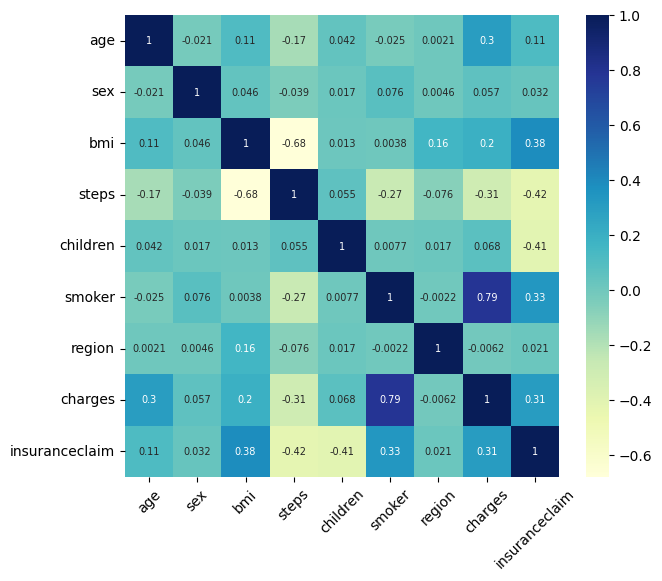

In [ ]:
fig, ax = plt.subplots(figsize=(7, 6))

sns.heatmap(df.corr(),
            annot=True,
            annot_kws={'fontsize': 7},
            cmap='YlGnBu',
            ax=ax)

ax.tick_params(axis='x', rotation=45)
ax.tick_params(axis='y', rotation=360);


Nampaknya target variable dataset ini tidak terlau memiliki korelasi yang benar-benar kuat dengan dependent variable lainnya. Insurance claim memiliki korelasi yang cukup kuat dengan fitur charges, smoker, dan bmi, yakni 0.31, 0.33, dan 0.38. Hal ini berarti ketika ketiga fitur tersebut memiliki nilai mendekati 1, maka akan semaki tinggi pula kecenderungan mereka tergolong kedalam kelas 1. Sebaliknya, fitur insurance claim memiliki korelasi negatif yang cukup kuat dengan fitur steps (-0.42) fitur children (-0.41). Ini berarti bahwa ketika nilai kedua fitur tersebut semakin tinggi, maka kecenderungan sesorang untuk mendapatkan insurance claim semakin rendah.

Perlu diingat bahwa nilai-nilai diatas (korelasi dengan insurance clain) tidak dapat sepenuhnya dikatakan berkorelasi kuat, biasanya korelasi kuat ditunjukan dengan angka 0.5 keatas. Misalnya korelasi kuat tersebut terlihat antara fitur bmi dengan fitur steps yakni -0.68. Ini berarti bahwa semakin besar nilai bmi seseorang maka akan semakin rendah jumlah langkah perhari yang dimiliki. Contoh lain ialah korelasi antara fitur smoker dengan fitur charges, semakin seseorang tersebut adalah perkok, maka biaya medical cost yang dimiliki akan semakin tinggi.

Kemudian saya menemukan permasalahan berkaitan dengan korelasi. Dapat dilihat bahwa fitur sex dan region memiliki korelasi yang sangat kecil dengan target variabel kita, besarnya haya 0.032 dan 0.021. Hal ini disebabkan secara data, persebaran antara gender dan region yang masuk kedalam kelas 0 maupun 1 cukup imbang. Oleh karena itu pada data pre-processing nanti saya akan menghapus kedua variabel tersebut. Adapun beberapa alasan lain ialah, karena korelasi dan nilai p-value nya yang rendah, fitur tersebut tidak memiliki penagruh yang signifikan pada prediksi model. Hal ini akan membantu model untuk bisa fokus pada fitur yang lebih penting. Selain itu dengan adanya fitur korelasi rendah akan meningkatkan kemungkinan overfitting dan menurunkan generalisasi.
Sedangkan untuk variabel bmi, step, charges, dan smoker, meskipun mereka memiliki korelasi yang tinggi, saya tidak akan membuang variabel tersebut sebab ke-empat variabel tersebut memiliki korelasi yang cukup besar terhadap target variable kita, keempat variabel tersebut masih dapat memberikan informasi yang berbeda dalam memprediksi target variable sehingga saya memutuskan untuk tidak menghapusnya.


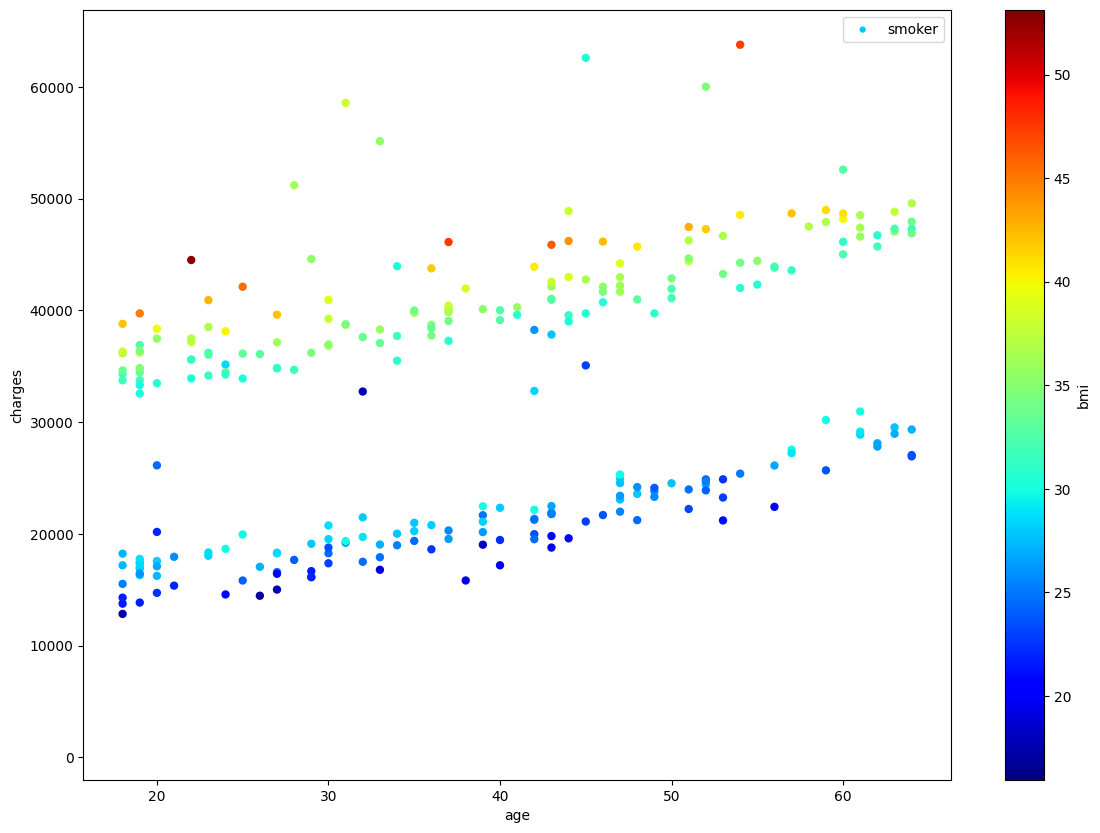

In [ ]:
df.plot(kind="scatter", x="age", y="charges", 
    s=df["smoker"]*25, label="smoker", figsize=(14,10),
    c='bmi', cmap=plt.get_cmap("jet"), colorbar=True,
    sharex=False)
plt.legend()

Relasi yang menarik nampak pada ketiga fitur: BMI, Charges, dan Smoking Status. 

## Pre-Processing

Sebelum menlanjutkan pada tahap modelling, ada beberapa tahapan yang perlu dilakukan untuk mempersiapkan data. Pada dataset ini tidak terlalu banyak masalah yang ditemukan. Adapun yang akan saya lakukan ialah:
1.   Memastikan bahwa tipe data adalah numerik.
2.   Menghapus variable yang berkorelasi sangat rendah terhadap target variable.
3.   Melakukan Scaling terhadap fitur dependent.
4.   Melakukan SMOTE Oversampling (Ini akan dilakukan setelah membagi data menjadi train, validation, dan test set.





### Memastikan bahwa tipe data adalah numerik

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             1338 non-null   int64  
 1   sex             1338 non-null   int64  
 2   bmi             1338 non-null   float64
 3   steps           1338 non-null   int64  
 4   children        1338 non-null   int64  
 5   smoker          1338 non-null   int64  
 6   region          1338 non-null   int64  
 7   charges         1338 non-null   float64
 8   insuranceclaim  1338 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 94.2 KB


### Menghapus variabel yang meiliki korelasi sangat rendah dengan target variable

In [ ]:
dfdrop = df.drop(["sex","region"], axis=1)

Pertama, saya memastikan bahwa seluruh isi data berupa numerik. Hal ini disebabkan model neural network hanya dapat memproses dan belajar dari data numerik. Pada data isnurance ini, seluruh fitur telah memiliki tipe data numerik. Data insurance tidak membutuhkan data pre-processing berupa encoding.

### Normalisasi data

Langkah selanjutnya yang saya lakukan adalah melakukan normalisasi data menggunakan scalling. Ada banyak metode dalam melakukan scaling seperti menggunakan min-max scaler, robust scaler, log scaler, power transformer, standars scaler, dan masih banyak lagi. Akan tetapi pada kesempatan ini saya akan menggunakan standard sebab metode ini merupakan metode yang paling umu digunakan, tahan terhadap outlier, serta dapat memebrikan hasil yang stabil sebab metode ini mengubah skala data sehinga distribusi data akan memiliki mean=0 dan standar deviasi = 1.

In [ ]:
# get the features and labels from the dataset
X = dfdrop[dfdrop.columns[0:6]].values
y = dfdrop.insuranceclaim.values.astype(np.int64)

# preprocessing with z-score normalization
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [ ]:
dfdrop

,age,bmi,steps,children,smoker,charges,insuranceclaim
0,19,27.900,3009,0,1,16884.92400,1
1,18,33.770,3008,1,0,1725.55230,1
2,28,33.000,3009,3,0,4449.46200,0
3,33,22.705,10009,0,0,21984.47061,0
4,32,28.880,8010,0,0,3866.85520,1
...,...,...,...,...,...,...,...
1333,50,30.970,4008,3,0,10600.54830,0
1334,18,31.920,3003,0,0,2205.98080,1
1335,18,36.850,3008,0,0,1629.83350,1
1336,21,25.800,8009,0,0,2007.94500,0


# Nomor 1b

Lakukan eksplorasi data terlebih dahulu untuk memahami permasalahan
yang dihadapi terlebih dahulu. Selanjutnya pisahkan dataset menjadi train, test dan validation
set dengan ketentuan (80 train, 10 val, 10 test)

## Data Visualization & description

In [ ]:
df.describe().T

Dari output diatas, dapat dilihat jumlah dari data yang ada, nilai rata-rata, standar deviasi, nilai minimal,
nilai q1 (kuartil bawah), median (q2), nilai q3 (kuartil atas), nilai maksimum dari tiap variable dalam dataset.

*   Observasi dilakukan pada usia dengan rentang 18 - 64 tahun. Hal ini berarti bahawa pengambilan data dilakukan pada kalangan dewasa yang secara fisik masih aktif melakukan kegiatan sehari-hari.
*   Dalam observasi, bmi terendah ialah 15.9 dan bmi tertinggi adalah 53.1 dengan rata-rata bmi adalah 30.6. Ini berarti bahwa dalam observasi mungkin ada yang mengalami gejala "underweight" atau "Obesity".
*   Rata-rata jumlah langkah yang pada seluruh observasi adalah sekitar 5000 langkah, rata-rata observasi pada data insurance melebihi rata-rata langkah pada negara US, yakni 3000 langkah.
*   Tidak semua observasi memiliki tanggungan anak.
*   Terdapat observasi yang merupakan perokok, namun nampaknya observasi perokok jumlahnya lebih sedikit dari observasi yang bukan perokok, hal ini ditandai dengan rata-rata dibawah 0.5 yakni 0.2.
*   Jumlah premi terendah dalam dataset ini adlah 1121 dolar, premi tertinggi sebesar 63770, dan rata-rata premi yang dibayarkan adalah 13270








In [ ]:
df.groupby('insuranceclaim').mean()

,age,sex,bmi,steps,children,smoker,region,charges
insuranceclaim,,,,,,,,
0,37.309910,0.486486,27.881586,6550.787387,1.681081,0.045045,1.488288,8821.421892
1,40.551724,0.518519,32.635179,4462.338442,0.679438,0.318008,1.535121,16423.928277


*   Kelas 1 (asuransi di claim) memiliki rata-rata observasi berusia 40 tahun, bmi sebesar 32.6, jumlah langkap perhari 4462 langkan, dan memiliki medical cost sekitar 16423 US dollar.
*   Sementara itu, Kelas 0 (asuransi tidak dikalim) memiliki rata-rata observasi berusia 37 tahun, bmi sebesar 27.8, jumlah langkah perhari 6550, cenderung bukan merupakan perokok, dan memiliki rata-rata medical cost sekitar 8821 US dollar.



### Insurance Claim

In [ ]:
Not_Claimed = df["insuranceclaim"].value_counts()[0]
Claimed = df["insuranceclaim"].value_counts()[1]

print("Not Claimed:", Not_Claimed)
print("Claimed:", Claimed)

Not Claimed: 555
Claimed: 783


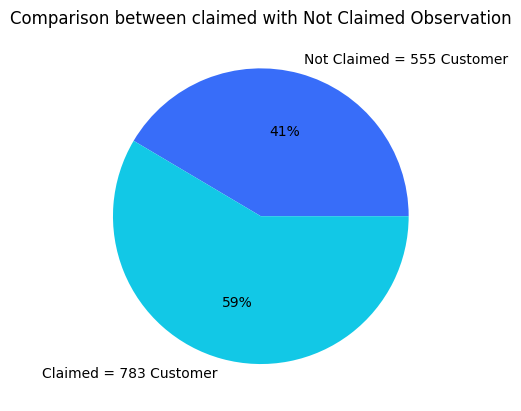

In [ ]:
data = [555,783]
labels = ['Not Claimed = 555 Customer', 'Claimed = 783 Customer']

colors = sns.color_palette('rainbow')[0:5]
plt.title("Comparison between claimed with Not Claimed Observation")
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%')
plt.show()

Jumlah perbandingan observasi di kelas 1 dan kelas 0 tidak imbang, meski hanya berbeda tipis. Namun data dikatakan baik apabila memiliki perbdandingan kelas yang imbang anatar kelas positif (kelas 1) dengan kelas negatif (kelas 0). Oleh karena itu, hal ini akan ditangani pada tahap pre-processing menggunakan SMOTE Oversampling.

### Numeric Variable: Age, BMI, Steps,Charges

In [ ]:
df_claimed = df[df['insuranceclaim'] == 1]
df_not_claimed = df[df['insuranceclaim'] == 0]

def plot_continuous(feature):
    '''Plot a histogram and boxplot for the Claimed and Not Claimed distributions for the specified feature.'''
    df_func = df.copy()
    df_func['insuranceclaim'] = df_func['insuranceclaim'].astype('category')

    fig, (ax1, ax2) = plt.subplots(2,
                                   figsize=(9, 7),
                                   sharex=True,
                                   gridspec_kw={'height_ratios': (.7, .3)})

    for data, color, label in zip([df_not_claimed, df_claimed], colors, ['Not Claimed', 'Claimed']):
        sns.histplot(data=data,
                     x=feature,
                     bins=15,
                     color=color,
                     alpha=0.66,
                     edgecolor='firebrick',
                     label=label,
                     kde=False,
                     ax=ax1)
    ax1.legend()

    sns.boxplot(x=feature, y='insuranceclaim', data=df_func, palette=colors, ax=ax2)
    ax2.set_ylabel('')
    ax2.set_yticklabels(['Not Claimed', 'Claimed'])

    plt.tight_layout();


print('✔️ Function Defined!')

✔️ Function Defined!


#### Age

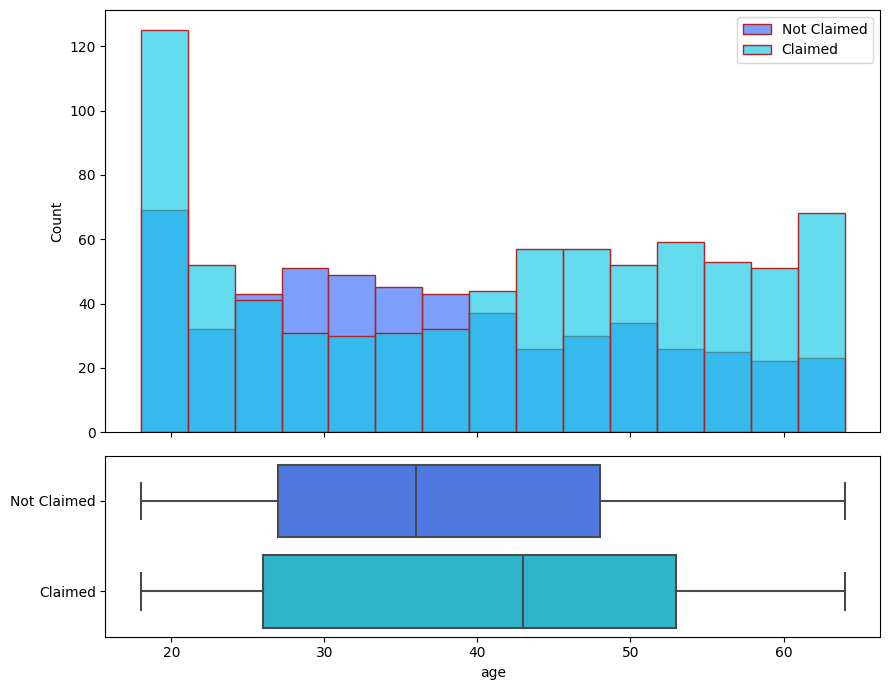

In [ ]:
plot_continuous('age')

Pada fitur usia, tidak ditemukan adanya outlier. Rata-rata usia observasi yang tidak mendapat claim asuransi sekitar 37 tahun, sedangkan rata-rata observasi yang mendapatkan claim asuransi ialah sekitar 41 tahun. Pada kelas 1 nampaknya memiliki banyak obsevasi yang berusia sekitar 20 tahun. Sedangkan untuk kelas 0, nampaknya persebaran sedikit condong di rentang usia 25 sampai 40 tahun.

#### BMI

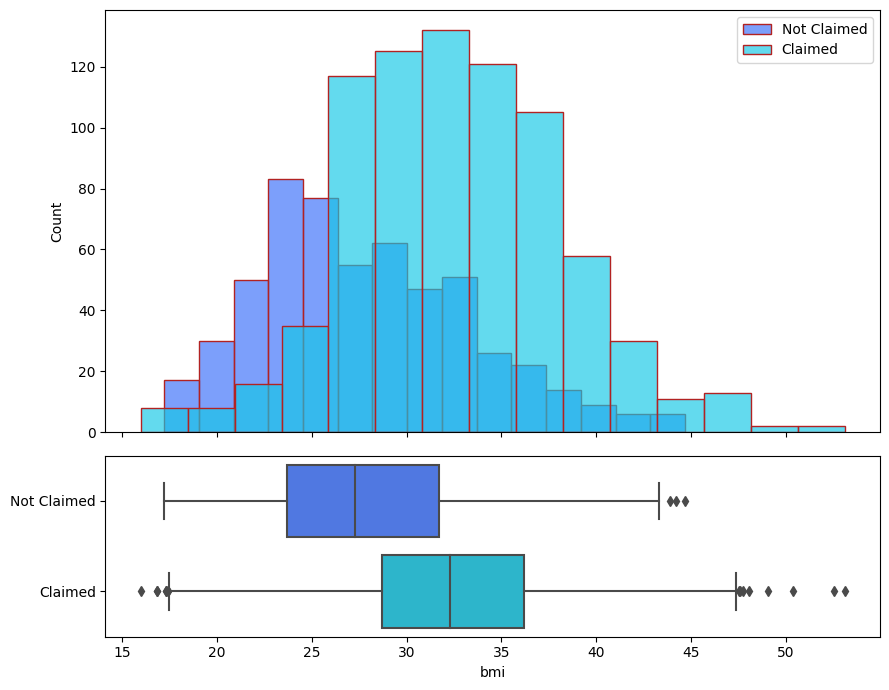

In [ ]:
plot_continuous('bmi')

Dari plot diatas dapat dilihat bahwa kelas 0 dan 1 memiliki persebaran yang mendekati normal. Rata-rata bmi pada observasi kelas 0 adalah sekitar 27, sedangkan untuk kelas 1 ialah sekitar 32-33. Observasi yang tergolong kedalam kelas 0 denderung untuk memiliki bmi di sekitar 20 sampai 30, sedangkan observasi yang tergolong kedalam kelas 1 cenderung untuk memiliki bmi 25 sampai 40. Pada fitur ini ditemukan beberapa outlier, namun ini merupakan hal yang wajar sebab dataset ini termasuk kedalam data medical, dimana berbagai kondisi sangat memungkinkan.

#### Steps

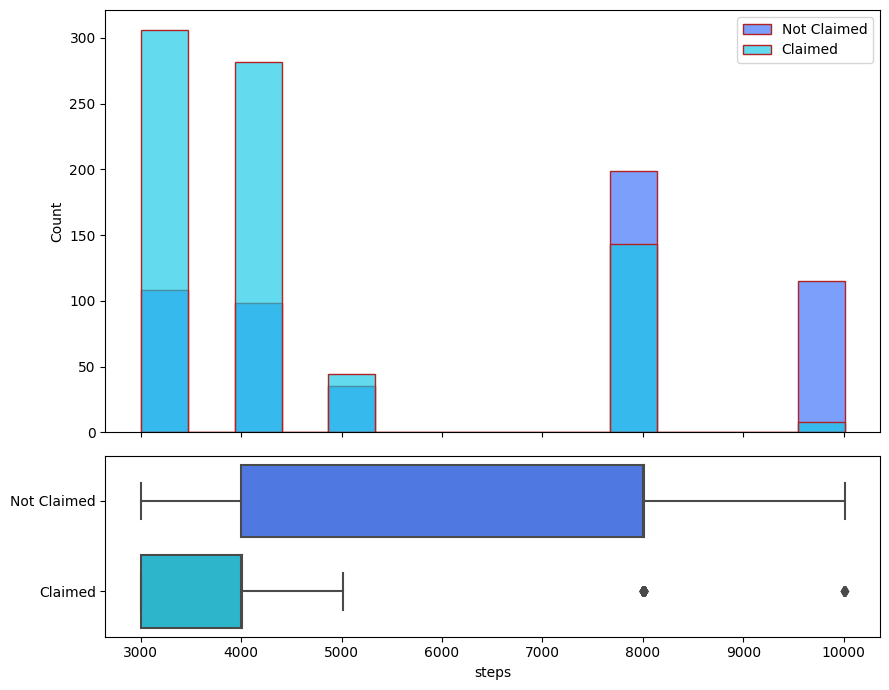

In [ ]:
plot_continuous('steps')

Untuk observasi yang tergolong kedalam kelas 1, cenderung untuk memiliki langkah yang lebih sedikit dibandingkan dengan kelas 0. Dalam fitur tidak ditemukan adanya outlier pada kelas 0, namun sebaliknya, ditemukan beberapa outlier pada kelas 1.

#### Charges

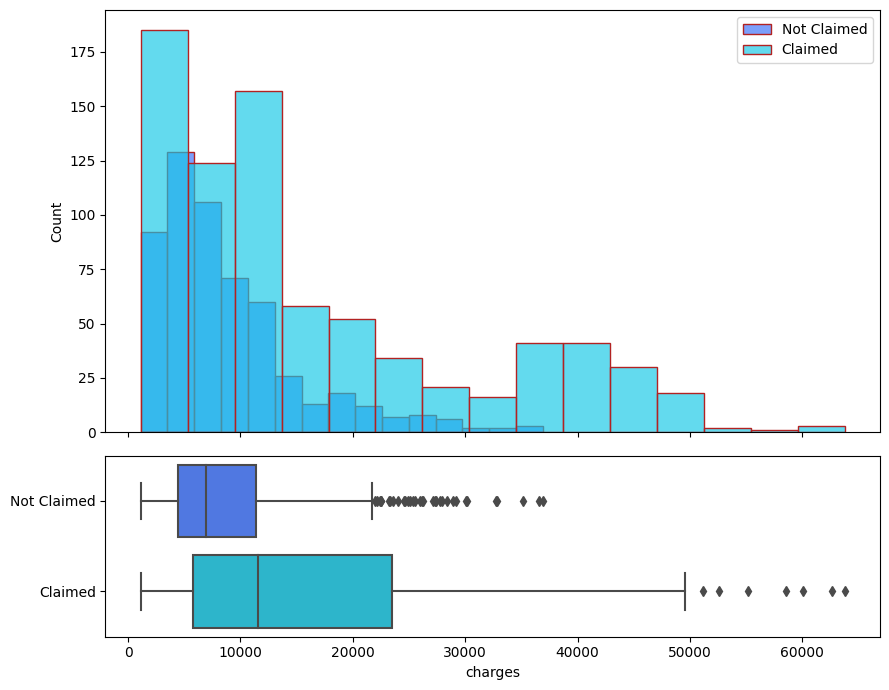

In [ ]:
plot_continuous('charges')

Pada fitur charges, sangat terlihat terjadi distribusi yang condong ke kiri, hal ini berarti niai median lebih kecil dari nilai rata-rata. Ditrmukan cukup banyak outlier, khususnya pada kelas 0.

### Categorical Variable: Sex, Children, Smoker, Region

#### Sex

<Axes: xlabel='insuranceclaim'>

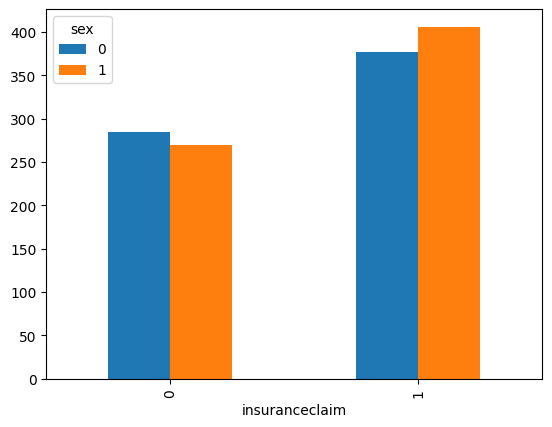

In [ ]:
df_plot = df.groupby(['sex', 'insuranceclaim']).size().reset_index().pivot(columns='sex', index='insuranceclaim', values=0)
df_plot.plot(kind='bar', stacked=False)

In [ ]:
df[["sex", "insuranceclaim"]].groupby(['sex']).mean().sort_values(by="insuranceclaim", ascending=True)

,insuranceclaim
sex,
0,0.569486
1,0.600592


Perbandingan gender di kelas 0 maupun kelas 1 tidak begitu jauh, pada kelas 0 gender perempuan memiliki jumlah yang lebih banyak dari gender laki-laki, sebaliknya pada kelas 1, jumlah gender laki-laki lebih banyak dari gender perempuan. Akan tetapi, perbedaan angka yang tidak begitu signifikan bisa menjadi tanda bahwa antara gender dengan insuranceclaim tidak memiliki relasi yang kuat.

#### Children

<Axes: xlabel='insuranceclaim'>

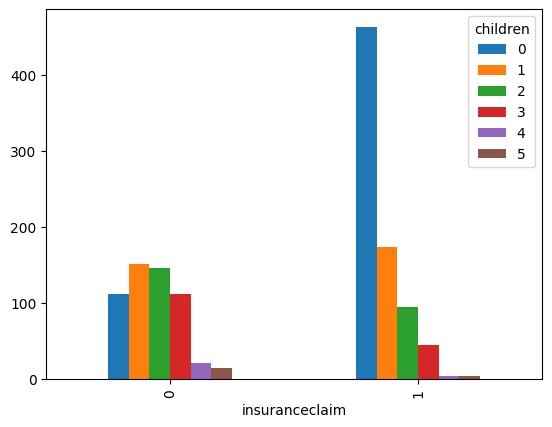

In [ ]:
df_plot = df.groupby(['children', 'insuranceclaim']).size().reset_index().pivot(columns='children', index='insuranceclaim', values=0)
df_plot.plot(kind='bar', stacked=False)

In [ ]:
df[["children", "insuranceclaim"]].groupby(['children']).mean().sort_values(by="insuranceclaim", ascending=True)

,insuranceclaim
children,
4,0.160000
5,0.222222
3,0.286624
2,0.391667
1,0.533951
0,0.806620


Baik pada kelas 0 maupun kelas 1, kecenderungan yang didapatkan ialah sama-sama memiliki tanggungan anak dibawah 4. Observasi dengan tanggungan anak 0 cenderung untuk masuk kedalam kelas 1.

#### Smoker

<Axes: xlabel='insuranceclaim'>

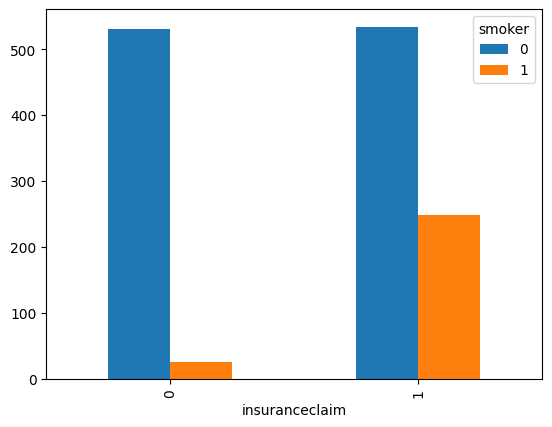

In [ ]:
df_plot = df.groupby(['smoker', 'insuranceclaim']).size().reset_index().pivot(columns='smoker', index='insuranceclaim', values=0)
df_plot.plot(kind='bar', stacked=False)

In [ ]:
df[["smoker", "insuranceclaim"]].groupby(['smoker']).mean().sort_values(by="insuranceclaim", ascending=True)

,insuranceclaim
smoker,
0,0.501880
1,0.908759


kelas 1 memiliki lebih banyak observasi yang merupakan perokok ketimbang kelas 0.

#### Region

<Axes: xlabel='insuranceclaim'>

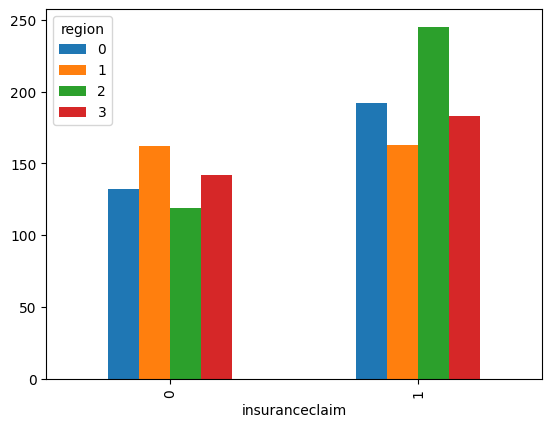

In [ ]:
df_plot = df.groupby(['insuranceclaim','region']).size().reset_index().pivot(columns='region', index='insuranceclaim', values=0)
df_plot.plot(kind='bar', stacked=False)

In [ ]:
df[["region", "insuranceclaim"]].groupby(['region']).mean().sort_values(by="insuranceclaim", ascending=True)

,insuranceclaim
region,
1,0.501538
3,0.563077
0,0.592593
2,0.673077


Seluruh region hampir memiliki kemungkinan untuk tergolong kedalam kelas 0 ataupun kelas 1. Hal ini dapat menjadi pertanda bahwa region tidak terlalu berpengaruh terhadap targt variabel yaitu insurance claim.

In [ ]:
df

,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,3009,0,1,3,16884.92400,1
1,18,1,33.770,3008,1,0,2,1725.55230,1
2,28,1,33.000,3009,3,0,2,4449.46200,0
3,33,1,22.705,10009,0,0,1,21984.47061,0
4,32,1,28.880,8010,0,0,1,3866.85520,1
...,...,...,...,...,...,...,...,...,...
1333,50,1,30.970,4008,3,0,1,10600.54830,0
1334,18,0,31.920,3003,0,0,0,2205.98080,1
1335,18,0,36.850,3008,0,0,2,1629.83350,1
1336,21,0,25.800,8009,0,0,3,2007.94500,0


## Memisahkan data menjadi 80% Train, 10% Validation, dan 10% Test

Sebelum saya melakukan data pre-processing yang ketiga, saya akan membagi data terlebih dahulu menjadi 80% train, 10% validation, dan 10% test. Hal ini disebabkan karena SMOTE oversampling hanya dilakukan pada training data, oversampling dilakukan untuk memanipulasi data pada training seingga data tersebut tidak merepresentasikan data asli. Jika training data yang telah dimanipulasi digunakan pada proses validasi maupun proses testing, maka hasil evaluasi model tidak lagi merepresentasikan perfoma model dalam memprediksi data asli. Sehingga tahap oversampling ini perlu dilakukan dengan hati-hati agar tidak terjadi kebocoran data pada data validasi dan testing.

In [ ]:
#Membuat kelas untuk dataset insurance
class InsuranceDataset(Dataset):
  def __init__(self, X, y):
    self.X = X
    self.y = y

  def __getitem__(self, index):
    X = torch.Tensor(self.X[index])
    y = torch.LongTensor(self.y[index, None])
    
    return X, y

  def __len__(self):
    return len(self.X)

In [ ]:
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.1,  random_state=1) #10 persen test , 90 persen training

train_X, valid_X, train_y, valid_y = train_test_split(train_X, train_y,  #dari 90 persen itu, 10 persennya validation, 90 persennya train.
                                                      test_size=0.1,  random_state=1)

## SMOTE Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE
over = SMOTE(sampling_strategy='auto', random_state=1)
train_X, train_y = over.fit_resample(train_X, train_y)

Seperti yang telah diketahui sebelumnya bahwa perbangian kelas target tidak imbang yaitu 41% kelas 0 dan 59% kelas 1. Oleh karena itu saya melakukan teknik oversampling pada dataset ini untuk meningkatkan kinerja algoritma dengan caa meningkatkan keberagaman dataset dan mengurangi kecondongan ke arah kelas mayoritas. SMOTE juga dapat mencegah overfitting dengan menghasilkan contoh baru yang mirip dengan kelas minoritas namun tidak identik, sehingga meningkatkan generalisasi model.

Alasan lain mengapa saya melakukan SMOTE Oversampling ialah, pada percobaan sebelumnya, saya telah melakukan komparasi pada dataset ini, dan didapatkan hasil yang lebih memuaskan ketimbang tanpa adanya oversampling

# Nomor 1c

[LO 3, LO 4, 5 poin] Buatlah arsitektur baseline dengan n nodes input layer, 2 buah hidden
layer dengan banyak 2 × n nodes awal dan layer akhir banyak kelas nya (n, 2 × n, 2 × n,
num_class). Keterangan: n adalah banyak input dan num_class adalah banyak kelas. Activation
function untuk tiap hidden layer menggunakan ReLU

## Membuat kelas objek dataset

In [ ]:
#membuat kelas objek dataset. Salah satu ciri khas pytorch ialah bersifat object oriented.
train_ds = InsuranceDataset(train_X, train_y)
train_loader = DataLoader(train_ds, batch_size=16, 
                             shuffle=True, num_workers=0)

valid_ds = InsuranceDataset(valid_X, valid_y)
valid_loader = DataLoader(valid_ds, batch_size=16, 
                             shuffle=False, num_workers=0)

test_ds = InsuranceDataset(test_X, test_y)
test_loader = DataLoader(test_ds, batch_size=16, 
                            shuffle=False, num_workers=0)

## Modelling Architechture (Base)

In [ ]:
#Membuat object model
class Net(nn.Module):
    # define nn
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(6, 12) #Input data ada 6 fitur, 12 menunjukan jumlah neuron di hidden layer pertama.
        self.bn1 = nn.BatchNorm1d(12) #Normalisasi, agar mempercepat training.
        
        self.fc2 = nn.Linear(12, 12) #12 merupakan jumalah hiden layer pertama, 12 berikutnya merupakan hidden layer kedua
        self.bn2 = nn.BatchNorm1d(12) #Normalisasi
        
        self.fc3 = nn.Linear(12, 2) #Jumlah output ada 2 yaitu 1 dan 0.

#total ada 2 hidden layer.


#arsitektur, model yg akan dirancang
    def forward(self, X):
        X = self.fc1(X) #fc1 --> Linier
        X = F.relu(X)
        X = self.bn1(X) #Untuk mempercepat proses training
        X = self.fc2(X)
        X = F.relu(X)
        X = self.bn2(X)
        X = self.fc3(X)

        return X

Kode diatas dilakuakn untuk merancang arsitektur neural netrowk menggunakan framework pytorch. Arsitektur terdiri dari 1 input layer (6 neuron), 2 hidden layer (setiap hidden layer memiliki 12 neuron), dan 1 output layer (2 neuron). Fungsi aktivasi yang digunakan adalah ReLU dan menggunakan model linier. Pada arsitektur diatas juga dilakukan normalisasi untuk mempercepat proses training.

Ketika menggunakan framework seperti PyTorch, TensorFlow, dan sebagainya untuk membuat neural network model,  kita tidak perlu membuat proses backpropagationnya secara manual. Framework yang disediakan telah dilengkapi dengan berbagai fungsi dan metode untuk menghitung gradiesn dari setiap parameter. Dengan begitu tugas kita adalah merancang arsitektur model neural network dan menentukan paramater yang cocok agar mendapatkan hasil yang paling optimal

In [ ]:
# Instantiating the model
net = Net() 

# Choosing the loss function
criterion = nn.CrossEntropyLoss() 

# Choosing the optimizer
optimizer = torch.optim.Adam(net.parameters(), lr=0.2) 

Pada kesempatan kali ini saya menggunakan nn.CrossEntropyLoss sebagai fungsi loss. Kita dapat menggunakan nn.CrossEntropyLoss untuk kasus klasifikasi biner dan akan memperlakukannya sebagai kasus klasifikasi multicclass dengan 2 kelas. Dalam hal ini kita mengeluarkan 2 output pada layer terakhir. Sebenarnya untuk kasus binary classification kita juga dapat menggunakan nn.BCELoss, akan tetapi kita mnggunakan BCELoss ketika pada layer terakhir jumlah outputnya adalah 1. Sehingga pada kasus ini saya menggunakan nn.CrossEntropyLoss sebagai fungsi loss dan memperlakukannya sebagai multiclass 2 kelas.

In [ ]:
epochs = 100 
 
train_mean_losses = []
valid_mean_losses = []

valid_best_loss = np.inf

for i in range(epochs):  
    #===============================================================
    # training 
    train_losses = []
    
    print("=========================================================")
    print("Epoch {}".format(i))
    
    for iteration, batch_data in enumerate(train_loader):
        X_batch, y_batch = batch_data
        
        optimizer.zero_grad()
        
        out = net(X_batch)
        loss = criterion(out, y_batch.squeeze())
        
        loss.backward()   # perhitungan backpropargation
        optimizer.step()
        
        train_losses.append(loss)   #memperbaharui setiap weight atau bbobot
    
    train_mean_loss = torch.mean(torch.stack(train_losses))
    print('training loss: {:10.8f}'.format(train_mean_loss))
    
    train_mean_losses.append(train_mean_loss)
    
    #===============================================================
    # validation
    #setiap epoch lakukan validation
    valid_losses = []
    with torch.set_grad_enabled(False):
        for iteration, batch_data in enumerate(valid_loader):
            X_batch, y_batch = batch_data

            out = net(X_batch)
            loss = criterion(out, y_batch.squeeze())
            valid_losses.append(loss)
            
        valid_mean_loss = torch.mean(torch.stack(valid_losses))
        print('validation loss: {:10.8f}'.format(valid_mean_loss))
        
        valid_mean_losses.append(valid_mean_loss)
        
        if valid_mean_loss.cpu().numpy()[()] < valid_best_loss:
            valid_best_loss = valid_mean_loss
            torch.save(net.state_dict(), "best_model.pth")
            best_epoch = i
    #===============================================================

Epoch 0
training loss: 0.51818955
validation loss: 0.45291004
Epoch 1
training loss: 0.38477057
validation loss: 0.38229349
Epoch 2
training loss: 0.35651681
validation loss: 0.26474166
Epoch 3
training loss: 0.36155200
validation loss: 0.41861546
Epoch 4
training loss: 0.33232474
validation loss: 0.26793084
Epoch 5
training loss: 0.36998308
validation loss: 0.34606192
Epoch 6
training loss: 0.42757609
validation loss: 0.31666753
Epoch 7
training loss: 0.29739246
validation loss: 0.46353972
Epoch 8
training loss: 0.38848051
validation loss: 0.26026851
Epoch 9
training loss: 0.42296559
validation loss: 0.33177680
Epoch 10
training loss: 0.31663328
validation loss: 0.27049240
Epoch 11
training loss: 0.30243647
validation loss: 0.23141582
Epoch 12
training loss: 0.29623455
validation loss: 0.26741692
Epoch 13
training loss: 0.25691050
validation loss: 0.27989852
Epoch 14
training loss: 0.26507556
validation loss: 0.42780858
Epoch 15
training loss: 0.31207785
validation loss: 0.31059420
Ep

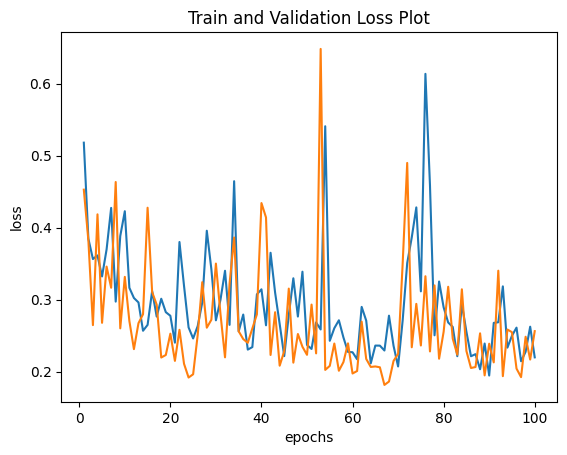

In [ ]:
import matplotlib.pyplot as plt
with torch.no_grad():
  plt.plot(range(1,epochs+1), train_mean_losses)
  plt.plot(range(1,epochs+1), valid_mean_losses)
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.title('Train and Validation Loss Plot')
  plt.show()

Output diatas adalah hasil pelatihan antara train set dengan validation set menggunakan model yang telah dibuat. Dalam hal ini saya menggunakan:
*  1 Input layer dengan jumlah 6 neuron, 2 hidden layer dengan jumlah 12 neuron setiap hidden layernya, dan 1 output layer dengan jumlah 2 neuron.
*  Fungsi aktivasi yang digunakan adalah ReLU dengan metode nn.Linear
*  Jumlah iterasi yang digunakan adalah 100 epoch 
*  Teknik optimasi yang digunakan adalah Adam dengan fungsi loss:Cross Entropy 
Loss
*  Besar learning rate adalah 0.2

Hasil diatas merupakan hasil yang cukup baik akan tetapi belum bisa dikatakan sangat baik. Warna birtu menandakan training set dan warna orange menandakan validation set. Karena perbedaan loss yang tidak terlalu berbeda jauh antara training set dengan validation set, kita akan menguji model kita ke test set.

In [ ]:
net.load_state_dict(torch.load("best_model.pth"))

<All keys matched successfully>

Kita akan mengambil model terbaik dari hasi uji diatas.

In [ ]:
test_predictions = np.empty((0,2))
with torch.no_grad():
    for iteration, batch_data in enumerate(test_loader):
        X_batch, y_batch = batch_data        
        out = net(X_batch)
        
        test_predictions = np.append(test_predictions, out.numpy(), 
                                     axis=0)
        

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

test_predictions = np.array(test_predictions)
test_predictions = np.argmax(np.array(test_predictions), axis=1)

print("=========================================================\n")
print("Predicted Class:")
print(test_predictions)
print("\nGround Truth:")
print(test_y)

print("\n=========================================================\n")
print("Confusion Matrix:")
print(confusion_matrix(test_y, test_predictions))

print("\n=========================================================\n")
accuracy = accuracy_score(test_y, test_predictions)
print("Accuracy: {}".format(accuracy))

f1 = f1_score(test_y, test_predictions, average='macro')
print("F1 Score: ", f1)

print("\n=========================================================\n")
print("Classification Report:")
print(classification_report(test_y, test_predictions))


Predicted Class:
[1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1
 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0
 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0
 0 1 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1]

Ground Truth:
[1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1
 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1]


Confusion Matrix:
[[48  4]
 [15 67]]


Accuracy: 0.8582089552238806
F1 Score:  0.8552998010798523


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.92      0.83        52
           1       0.94      0.82      0.88        82

    accuracy                           0.86       134
   macro avg       0.85      0.87      0.86       134
weighted avg       0.87 

Output diatas merupakan hasil penerapan model baseline kepada testing set. Hasil menunjukan performa yang sanga baik, nilai akurasi, presisi, dan recall semua berada diatas 85%.
*   Accuracy: Secara keseluruhan, seberapa sering mode kita memprediksi setiap observasi dengan tepat?
*   Presisi: Positive predicted value, ketika observasi di prediksi sebagai kelas 1, berapa kali hal tersebut benar? Berbicara  tentang seberapa bermanfaat hasil yang didapatkan. Biasanya presisi yang tinggi dibutuhkan untuk recomendation system, e-commece, dan website.
*   Recall: True positive rate, ketika pada kenyataanya observasi dikategorikan kedalam kelas 1, sebarapa sering itu benar? Bercicara tentang seberapa *complete* hasil kita. Biasanya recall yang tinggi dibutuhkan unutk data medical.
*   F1-score: Rata-rata hamonic dari pesisi dan recall. F1 dipakai ketika nilai true negatif tinggi, atau ketika penambahan data tidak terlalu berpengaruh pada hasil performa.

Saya akan membahas hasil output diatas setelah melakukan tunning hyperparameter.

Pada kesempatan berikutnya saya melakukan tunning hyperparameter dan memodifikasi arsitektur baseline. Saya mencoba 10 kali modifikasi arsitektut beserta tunning hyper parameter. Dari kesepuluh percobaan tersebut didapatkan hasil yang paling memuaskan yaitu:

# Nomor 1d
[LO 3, LO 4, 15 poin] Setelah mengetahui hasil dari nomor (1c), modifikasi arsitektur pada
nomor 1c untuk mendapatkan nilai akurasi optimal yang kalian dapatkan (kalian dapat
menambahkan atau mengurangi arsitektur tersebut, atau mengganti hyperparameter, atau
menggunakan tuning pada hyperparameter). Jelaskan alasan kalian untuk menggunakan
pendekatan yang kalian pilih.

## Modifikasi Arsitektur 1

*   Jumlah hidden layer masih sama yakni 2, akan tetapi jumlah neuron di hidden layer pertama dan kedua diubah menjadi 20.
*   Optimasi yang digunakan adalah SGD dengan learning rate 0.01
*   Jumlah epoch adalah 300




In [ ]:
#bikin object model
class Net(nn.Module):
    # define nn
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(6, 20) 
        self.bn1 = nn.BatchNorm1d(20)
        
        self.fc2 = nn.Linear(20, 20) 
        self.bn2 = nn.BatchNorm1d(20)
        
        self.fc3 = nn.Linear(20, 2) 
#total ada 2 hidden layer.


#arsitektur, model yg kita rancang
    def forward(self, X):
        X = self.fc1(X)
        X = F.relu(X)
        X = self.bn1(X) 
        X = self.fc2(X)
        X = F.relu(X)
        X = self.bn2(X)
        X = self.fc3(X)

        return X

In [ ]:
# Instantiating the model
net = Net() 

# Choosing the loss function
criterion = nn.CrossEntropyLoss() 

# Choosing the optimizer
optimizer = torch.optim.SGD(net.parameters(), lr=0.01) 

In [ ]:
epochs = 300 
 
train_mean_losses = []
valid_mean_losses = []

valid_best_loss = np.inf

for i in range(epochs):  
    #===============================================================
    # training 
    train_losses = []
    
    print("=========================================================")
    print("Epoch {}".format(i))
    
    for iteration, batch_data in enumerate(train_loader):
        X_batch, y_batch = batch_data
        
        optimizer.zero_grad()
        
        out = net(X_batch)
        loss = criterion(out, y_batch.squeeze())
        
        loss.backward()  
        optimizer.step()
        
        train_losses.append(loss)  
    
    train_mean_loss = torch.mean(torch.stack(train_losses))
    print('training loss: {:10.8f}'.format(train_mean_loss))
    
    train_mean_losses.append(train_mean_loss)
    
    #===============================================================
    # validation
    valid_losses = []
    with torch.set_grad_enabled(False):
        for iteration, batch_data in enumerate(valid_loader):
            X_batch, y_batch = batch_data

            out = net(X_batch)
            loss = criterion(out, y_batch.squeeze())
            valid_losses.append(loss)
            
        valid_mean_loss = torch.mean(torch.stack(valid_losses))
        print('validation loss: {:10.8f}'.format(valid_mean_loss))
        
        valid_mean_losses.append(valid_mean_loss)
        
        if valid_mean_loss.cpu().numpy()[()] < valid_best_loss:
            valid_best_loss = valid_mean_loss
            torch.save(net.state_dict(), "best_model.pth")
            best_epoch = i
    #===============================================================

Epoch 0
training loss: 0.45553604
validation loss: 0.40837893
Epoch 1
training loss: 0.37022632
validation loss: 0.37232083
Epoch 2
training loss: 0.33729371
validation loss: 0.34833816
Epoch 3
training loss: 0.33376542
validation loss: 0.34124485
Epoch 4
training loss: 0.29554191
validation loss: 0.31201831
Epoch 5
training loss: 0.30351612
validation loss: 0.31221202
Epoch 6
training loss: 0.26308605
validation loss: 0.25674456
Epoch 7
training loss: 0.24523143
validation loss: 0.27808720
Epoch 8
training loss: 0.23852459
validation loss: 0.27349529
Epoch 9
training loss: 0.21555392
validation loss: 0.23131469
Epoch 10
training loss: 0.22944969
validation loss: 0.25057793
Epoch 11
training loss: 0.21942605
validation loss: 0.22603102
Epoch 12
training loss: 0.23373507
validation loss: 0.31309319
Epoch 13
training loss: 0.23348345
validation loss: 0.26482266
Epoch 14
training loss: 0.22044796
validation loss: 0.25336629
Epoch 15
training loss: 0.19631176
validation loss: 0.21342738
Ep

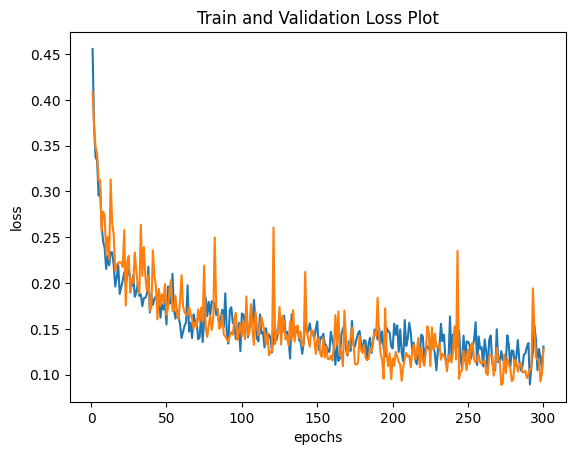

In [ ]:
import matplotlib.pyplot as plt
with torch.no_grad():
  plt.plot(range(1,epochs+1), train_mean_losses)
  plt.plot(range(1,epochs+1), valid_mean_losses)
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.title('Train and Validation Loss Plot')
  plt.show()

In [ ]:
net.load_state_dict(torch.load("best_model.pth"))

<All keys matched successfully>

In [ ]:
test_predictions = np.empty((0,2))
with torch.no_grad():
    for iteration, batch_data in enumerate(test_loader):
        X_batch, y_batch = batch_data        
        out = net(X_batch)
        
        test_predictions = np.append(test_predictions, out.numpy(), 
                                     axis=0)
        

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

test_predictions = np.array(test_predictions)
test_predictions = np.argmax(np.array(test_predictions), axis=1)

print("=========================================================\n")
print("Predicted Class:")
print(test_predictions)
print("\nGround Truth:")
print(test_y)

print("\n=========================================================\n")
print("Confusion Matrix:")
print(confusion_matrix(test_y, test_predictions))

print("\n=========================================================\n")
accuracy = accuracy_score(test_y, test_predictions)
print("Accuracy: {}".format(accuracy))

f1 = f1_score(test_y, test_predictions, average='macro')
print("F1 Score: ", f1)

print("\n=========================================================\n")
print("Classification Report:")
print(classification_report(test_y, test_predictions))


Predicted Class:
[1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 0 0 1
 0 1 1 0 1 1 1 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1
 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 0 0 1 0 0 1]

Ground Truth:
[1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1
 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1]


Confusion Matrix:
[[48  4]
 [ 7 75]]


Accuracy: 0.917910447761194
F1 Score:  0.9144366401578916


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.92      0.90        52
           1       0.95      0.91      0.93        82

    accuracy                           0.92       134
   macro avg       0.91      0.92      0.91       134
weighted avg       0.92  

# Nomor 1e

[LO 3, LO 4, 5 poin] Lakukan evaluasi unjuk kerja kedua arsitektur di atas pada test set dengan
mencari nilai accuracy, precision, recall dan F1-Score. Dan berikan penjelasan mengenai
hasilnya dengan rinci.

## Perbandingan Arsitektuk Baseline dengan Arsitektur Modifikasi

Diatas merupakan percobaan terbaik dari kesepuluh eksperimen yang terlah dilakukan. Adapun perubahan dari arsitektur baseline yakni:
*   Jumlah hidden layer sama yaitu 2, akan tetapi pada kedua layer, jumlah neuron berubah menjadi 20 neuron.
*   Learning rate diturunkan dari 0.2 sampai 0.01
*   Jumlah iterasi/epoch ditambah dari 100 menjadi 300
*   Untuk fungsi optimasi menggunakan SGD, yaitu menggunakan ReLU function.

Dari hasil diatas terjadi peningkatan performa yang cukup signifikan, dari yang awalnya memiliki akurasi sebesar 86%, setelah dilakukan tunning parameter dan modifikasi arsitektur, akurasi mengingkat menjadi 92%. Hal yang sama terjadi pada nilai f1-score yang semula bernilai 86% meningkat menjadi 92%, nilai precision yang semula bernilai 85% meningkat menjadi 91%, serta nilai recall yang semula bernilai 87% meningkat menjadi 92%. Hal ini berart model modifikasi sudah berjalan dengan optimum ketimbang model arsitektur baseline.

Berikut merupakan penjelasan mengapa model modifikasi bisa mendapatkan akurasi yang cukup tinggi:
*   Menambah jumlah neuron dapat meningkatkan kemampuan model untuk menemukan pola-pola yang lebih komplek sehingga meningkatkan performa data. Dengan meningkatkan neuron, model dapat mempelahari pola yang lebih kompleks dan data yang lebih rumit. Akan tetapi peningkatan jumlah neuron yang terlalu banyak dapat menuju overfitting, sehingga penambahan jumlah neuron harus dipertimbangkan baik baik.
*  Learning rate dan jumlah epoch. Learning rate dan jumlah epoch merupakan dua hyperparameter yang sanget penting dalam proses pelatihan neural network. Learning rate akan berpengaruh pada perubahan bobot model setiap kali diupdate, sedangkan epoch menentukan seberapa sering model melihat dataset training selama proses pelatihan. Pada model base arsitektur sebelumnya, saya menggunakan learning rate sebesar 0.2, mungkin learning rate tersebut cukup besar sehingga model melompati titik minimum loss dan tidak dapat kemabli menemukan titik minimum global. Selain itu epoch yang kurang cukup banyak mungkin membuat model tidak memiliki cukup waktu untuk mempelajari data yang ada. Oleh karena itu, melalui berbagai eksperimen saya menurunkan learning rate menjadi 0.01 (jangan terlalu kecil karena akan memakan waktu yang lama) serta menaikan jumlah epoch, dengan adanya kedua ini, mungkin model yang dibuat dapat menemukan nilai optimal dari bobotnya tanpa terlalu cepata atau lambat sehingga menghasilkan performa yang cukup memuaskan.

Kemudian, baik pada model astiketur base dengan model arstitektur setelah modifikasi, tidak terlalu terlihat pola overfitting ataupun underfitting. Akan tetapi pada model setelah dilakukan tuning, nilai loss antara training dengan validasi nampak lebih berdekatan dan mengalami penurunan loss yang perlahan tapi konsisten. Hal ini berbeda dengan nilai loss pada training dan validasi set di model sebelumnya yang cenderung lebih tidak stabil dan kurang terlihat perkembangannya. Hal ini dapat berarti bahwa model secara bertahap menyesuaikan diri dengan data pelatihan san semakin akurat dalam meprediksi nilai target.

Contoh model yang overfit terlihat pada modifikasi arsitektur 5. Pada modifikasi arsitektur tersebut terlihat bahwa antara loss train set (biru) dan validation set (orange) tidak berdempetan sama sekali. Garis biru selalu berada jauh di bawah garis orange.Ini berarti bahwa model bekerja dengan baik, menghasilkan loss yang semakin kecil hanya pada train set. 








# Nomor 1f

https://drive.google.com/drive/folders/1iIxpxIgVLqB1G-cWYxDCVfliwRd05f-k?usp=sharing 

# Modifikasi Arsitektur 2

*   Jumlah hidden layer 1 dengan jumlah neuron 16 pada hidden layer tersebut
*   Optimasi yang digunakan adalah SGD dengan learning rate 0.1
*   Jumlah epoch adalah 400

In [ ]:
#bikin object model
class Net(nn.Module):
    # define nn
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(6, 16) 
        self.bn1 = nn.BatchNorm1d(16)
    
        self.fc2 = nn.Linear(16, 2)


#arsitektur, model yg kita rancang
    def forward(self, X):
        X = self.fc1(X) 
        X = F.relu(X)
        X = self.bn1(X) 
        X = self.fc2(X)

        return X

In [ ]:
# Instantiating the model
net = Net() 

# Choosing the loss function
criterion = nn.CrossEntropyLoss()

# Choosing the optimizer
optimizer = torch.optim.SGD(net.parameters(), lr=0.1) 

In [ ]:
epochs = 400
 
train_mean_losses = []
valid_mean_losses = []

valid_best_loss = np.inf

for i in range(epochs):  
    #===============================================================
    # training 
    train_losses = []
    
    print("=========================================================")
    print("Epoch {}".format(i))
    
    for iteration, batch_data in enumerate(train_loader):
        X_batch, y_batch = batch_data
        
        optimizer.zero_grad()
        
        out = net(X_batch)
        loss = criterion(out, y_batch.squeeze())
        
        loss.backward()   
        optimizer.step()
        
        train_losses.append(loss)   
    
    train_mean_loss = torch.mean(torch.stack(train_losses))
    print('training loss: {:10.8f}'.format(train_mean_loss))
    
    train_mean_losses.append(train_mean_loss)
    
    #===============================================================
    # validation
    valid_losses = []
    with torch.set_grad_enabled(False):
        for iteration, batch_data in enumerate(valid_loader):
            X_batch, y_batch = batch_data

            out = net(X_batch)
            loss = criterion(out, y_batch.squeeze())
            valid_losses.append(loss)
            
        valid_mean_loss = torch.mean(torch.stack(valid_losses))
        print('validation loss: {:10.8f}'.format(valid_mean_loss))
        
        valid_mean_losses.append(valid_mean_loss)
        
        if valid_mean_loss.cpu().numpy()[()] < valid_best_loss:
            valid_best_loss = valid_mean_loss
            torch.save(net.state_dict(), "best_model.pth")
            best_epoch = i
    #===============================================================

Epoch 0
training loss: 0.37094828
validation loss: 0.35139602
Epoch 1
training loss: 0.32610264
validation loss: 0.28421313
Epoch 2
training loss: 0.27613422
validation loss: 0.40950888
Epoch 3
training loss: 0.28877994
validation loss: 0.29952717
Epoch 4
training loss: 0.26020467
validation loss: 0.25451851
Epoch 5
training loss: 0.25781599
validation loss: 0.27470535
Epoch 6
training loss: 0.27913594
validation loss: 0.29666698
Epoch 7
training loss: 0.24742590
validation loss: 0.24806392
Epoch 8
training loss: 0.26162255
validation loss: 0.28125936
Epoch 9
training loss: 0.27515411
validation loss: 0.26560751
Epoch 10
training loss: 0.26785627
validation loss: 0.29949275
Epoch 11
training loss: 0.27936235
validation loss: 0.34325838
Epoch 12
training loss: 0.24138848
validation loss: 0.24769658
Epoch 13
training loss: 0.25028539
validation loss: 0.23460236
Epoch 14
training loss: 0.24544643
validation loss: 0.22076857
Epoch 15
training loss: 0.25344878
validation loss: 0.21087778
Ep

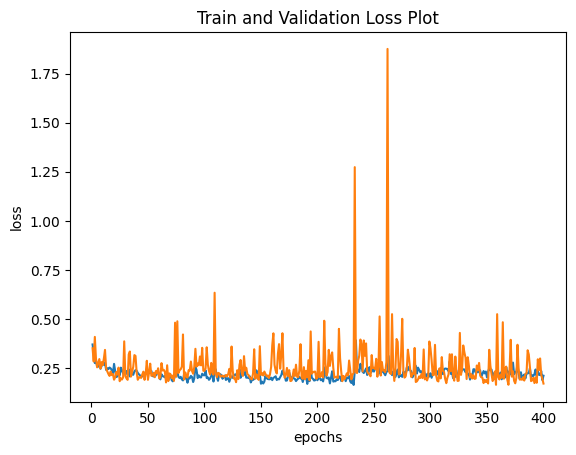

In [ ]:
import matplotlib.pyplot as plt
with torch.no_grad():
  plt.plot(range(1,epochs+1), train_mean_losses)
  plt.plot(range(1,epochs+1), valid_mean_losses)
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.title('Train and Validation Loss Plot')
  plt.show()

In [ ]:
net.load_state_dict(torch.load("best_model.pth"))

<All keys matched successfully>

In [ ]:
test_predictions = np.empty((0,2))
with torch.no_grad():
    for iteration, batch_data in enumerate(test_loader):
        X_batch, y_batch = batch_data        
        out = net(X_batch)
        
        test_predictions = np.append(test_predictions, out.numpy(), 
                                     axis=0)
        

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

test_predictions = np.array(test_predictions)
test_predictions = np.argmax(np.array(test_predictions), axis=1)

print("=========================================================\n")
print("Predicted Class:")
print(test_predictions)
print("\nGround Truth:")
print(test_y)

print("\n=========================================================\n")
print("Confusion Matrix:")
print(confusion_matrix(test_y, test_predictions))

print("\n=========================================================\n")
accuracy = accuracy_score(test_y, test_predictions)
print("Accuracy: {}".format(accuracy))

f1 = f1_score(test_y, test_predictions, average='macro')
print("F1 Score: ", f1)

print("\n=========================================================\n")
print("Classification Report:")
print(classification_report(test_y, test_predictions))


Predicted Class:
[1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1
 0 1 1 0 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 1
 1 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1
 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1]

Ground Truth:
[1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1
 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1]


Confusion Matrix:
[[48  4]
 [13 69]]


Accuracy: 0.8731343283582089
F1 Score:  0.8699400513845276


Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.92      0.85        52
           1       0.95      0.84      0.89        82

    accuracy                           0.87       134
   macro avg       0.87      0.88      0.87       134
weighted avg       0.88 

# Modifikasi Arsitektur 3


*   Hidden layer berjumlah 3, dengan jumlah neuron di masing-masing hidden layer sebanyak 16 neuron
*   Optimasi yang digunakan adalah SGD dengan learning rate=0.5
*   Epoch sebanyak 300



In [ ]:
#bikin object model
class Net(nn.Module):
    # define nn
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(6, 12) 
        self.bn1 = nn.BatchNorm1d(12)
        
        self.fc2 = nn.Linear(12, 12) 
        self.bn2 = nn.BatchNorm1d(12)

        self.fc3 = nn.Linear(12, 12)
        self.bn3 = nn.BatchNorm1d(12)
        
        self.fc4 = nn.Linear(12, 2)
#total ada 2 hidden layer.


#arsitektur, model yg kita rancang
    def forward(self, X):
        X = self.fc1(X) #fc1 --> linier, perceptron biasa. dense dlm 
        X = F.relu(X)
        X = self.bn1(X) 
        X = self.fc2(X)
        X = F.relu(X)
        X = self.bn2(X)
        X = self.fc3(X)
        X = F.relu(X)
        X = self.bn3(X)
        X = self.fc4(X)

        return X

In [ ]:
# Instantiating the model
net = Net() 

# Choosing the loss function
criterion = nn.CrossEntropyLoss() 

# Choosing the optimizer
optimizer = torch.optim.SGD(net.parameters(), lr=0.5) 

In [ ]:
epochs = 500 #jumlah epoch 300 epoch
 
train_mean_losses = []
valid_mean_losses = []

valid_best_loss = np.inf

for i in range(epochs):  
    #===============================================================
    # training 
    train_losses = []
    
    print("=========================================================")
    print("Epoch {}".format(i))
    
    for iteration, batch_data in enumerate(train_loader):
        X_batch, y_batch = batch_data
        
        optimizer.zero_grad()
        
        out = net(X_batch)
        loss = criterion(out, y_batch.squeeze())
        
        loss.backward()   # perhitungan backpropargation
        optimizer.step()
        
        train_losses.append(loss)   #memperbaharui setiao weight atau bbobot
    
    train_mean_loss = torch.mean(torch.stack(train_losses))
    print('training loss: {:10.8f}'.format(train_mean_loss))
    
    train_mean_losses.append(train_mean_loss)
    
    #===============================================================
    # validation#setiap epoch lakukan validation
    valid_losses = []
    with torch.set_grad_enabled(False):
        for iteration, batch_data in enumerate(valid_loader):
            X_batch, y_batch = batch_data

            out = net(X_batch)
            loss = criterion(out, y_batch.squeeze())
            valid_losses.append(loss)
            
        valid_mean_loss = torch.mean(torch.stack(valid_losses))
        print('validation loss: {:10.8f}'.format(valid_mean_loss))
        
        valid_mean_losses.append(valid_mean_loss)
        
        if valid_mean_loss.cpu().numpy()[()] < valid_best_loss:
            valid_best_loss = valid_mean_loss
            torch.save(net.state_dict(), "best_model.pth")
            best_epoch = i
    #===============================================================

Epoch 0
training loss: 0.40107766
validation loss: 0.45305672
Epoch 1
training loss: 0.32703072
validation loss: 0.62668830
Epoch 2
training loss: 0.36042070
validation loss: 0.43439862
Epoch 3
training loss: 0.30474421
validation loss: 0.21988975
Epoch 4
training loss: 0.27604687
validation loss: 0.26239783
Epoch 5
training loss: 0.29118446
validation loss: 0.24153706
Epoch 6
training loss: 0.23241775
validation loss: 0.29505605
Epoch 7
training loss: 0.29306990
validation loss: 0.38701931
Epoch 8
training loss: 0.28264740
validation loss: 0.26919794
Epoch 9
training loss: 0.25887719
validation loss: 0.18836743
Epoch 10
training loss: 0.23841399
validation loss: 0.22614947
Epoch 11
training loss: 0.25032613
validation loss: 0.30327496
Epoch 12
training loss: 0.24634504
validation loss: 0.41075492
Epoch 13
training loss: 0.24419001
validation loss: 0.30292913
Epoch 14
training loss: 0.22423561
validation loss: 0.48254937
Epoch 15
training loss: 0.23543954
validation loss: 0.21408474
Ep

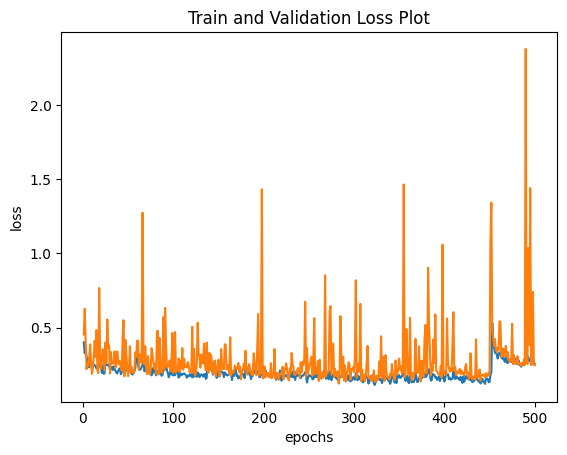

In [ ]:
import matplotlib.pyplot as plt
with torch.no_grad():
  plt.plot(range(1,epochs+1), train_mean_losses)
  plt.plot(range(1,epochs+1), valid_mean_losses)
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.title('Train and Validation Loss Plot')
  plt.show()

In [ ]:
net.load_state_dict(torch.load("best_model.pth"))

<All keys matched successfully>

In [ ]:
test_predictions = np.empty((0,2))
with torch.no_grad():
    for iteration, batch_data in enumerate(test_loader):
        X_batch, y_batch = batch_data        
        out = net(X_batch)
        
        test_predictions = np.append(test_predictions, out.numpy(), 
                                     axis=0)
        

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

test_predictions = np.array(test_predictions)
test_predictions = np.argmax(np.array(test_predictions), axis=1)

print("=========================================================\n")
print("Predicted Class:")
print(test_predictions)
print("\nGround Truth:")
print(test_y)

print("\n=========================================================\n")
print("Confusion Matrix:")
print(confusion_matrix(test_y, test_predictions))

print("\n=========================================================\n")
accuracy = accuracy_score(test_y, test_predictions)
print("Accuracy: {}".format(accuracy))

f1 = f1_score(test_y, test_predictions, average='macro')
print("F1 Score: ", f1)

print("\n=========================================================\n")
print("Classification Report:")
print(classification_report(test_y, test_predictions))


Predicted Class:
[1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1
 0 1 1 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1
 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1]

Ground Truth:
[1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1
 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1]


Confusion Matrix:
[[48  4]
 [ 9 73]]


Accuracy: 0.9029850746268657
F1 Score:  0.8994864693324102


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        52
           1       0.95      0.89      0.92        82

    accuracy                           0.90       134
   macro avg       0.90      0.91      0.90       134
weighted avg       0.91 

# Modifikasi Arsitektur 4


*   Hidden layer berjumlah 2, dengan jumlah neuron di masing-masing hidden layer sebanyak 15 neuron
*   Optimasi yang digunakan adalah SGD dengan learning rate=0.15
*   Epoch sebanyak 400

In [ ]:
#bikin object model
class Net(nn.Module):
    # define nn
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(6, 15) 
        self.bn1 = nn.BatchNorm1d(15)
        
        self.fc2 = nn.Linear(15, 15)
        self.bn2 = nn.BatchNorm1d(15)
        
        self.fc3 = nn.Linear(15, 2)
#total ada 2 hidden layer.


#arsitektur, model yg kita rancang
    def forward(self, X):
        X = self.fc1(X) 
        X = F.relu(X)
        X = self.bn1(X) 
        X = self.fc2(X)
        X = F.relu(X)
        X = self.bn2(X)
        X = self.fc3(X)

        return X

In [ ]:
# Instantiating the model
net = Net() 

# Choosing the loss function
criterion = nn.CrossEntropyLoss()

# Choosing the optimizer
optimizer = torch.optim.SGD(net.parameters(), lr=0.15) 

In [ ]:
epochs = 400 
 
train_mean_losses = []
valid_mean_losses = []

valid_best_loss = np.inf

for i in range(epochs):  
    #===============================================================
    # training 
    train_losses = []
    
    print("=========================================================")
    print("Epoch {}".format(i))
    
    for iteration, batch_data in enumerate(train_loader):
        X_batch, y_batch = batch_data
        
        optimizer.zero_grad()
        
        out = net(X_batch)
        loss = criterion(out, y_batch.squeeze())
        
        loss.backward()   
        optimizer.step()
        
        train_losses.append(loss) 
    
    train_mean_loss = torch.mean(torch.stack(train_losses))
    print('training loss: {:10.8f}'.format(train_mean_loss))
    
    train_mean_losses.append(train_mean_loss)
    
    #===============================================================
    # validation#setiap epoch lakukan validation
    valid_losses = []
    with torch.set_grad_enabled(False):
        for iteration, batch_data in enumerate(valid_loader):
            X_batch, y_batch = batch_data

            out = net(X_batch)
            loss = criterion(out, y_batch.squeeze())
            valid_losses.append(loss)
            
        valid_mean_loss = torch.mean(torch.stack(valid_losses))
        print('validation loss: {:10.8f}'.format(valid_mean_loss))
        
        valid_mean_losses.append(valid_mean_loss)
        
        if valid_mean_loss.cpu().numpy()[()] < valid_best_loss:
            valid_best_loss = valid_mean_loss
            torch.save(net.state_dict(), "best_model.pth")
            best_epoch = i
    #===============================================================

Epoch 0
training loss: 0.37423196
validation loss: 0.30794063
Epoch 1
training loss: 0.30698010
validation loss: 0.33224955
Epoch 2
training loss: 0.30239806
validation loss: 0.27699167
Epoch 3
training loss: 0.28709742
validation loss: 0.28314865
Epoch 4
training loss: 0.25526324
validation loss: 0.25985125
Epoch 5
training loss: 0.26790494
validation loss: 0.27901378
Epoch 6
training loss: 0.25476193
validation loss: 0.24843375
Epoch 7
training loss: 0.26683229
validation loss: 0.22815989
Epoch 8
training loss: 0.24291238
validation loss: 0.22747537
Epoch 9
training loss: 0.21336386
validation loss: 0.24920806
Epoch 10
training loss: 0.22615004
validation loss: 0.34981042
Epoch 11
training loss: 0.24378558
validation loss: 0.37137881
Epoch 12
training loss: 0.23086816
validation loss: 0.23838668
Epoch 13
training loss: 0.23935968
validation loss: 0.29426754
Epoch 14
training loss: 0.23828992
validation loss: 0.25486892
Epoch 15
training loss: 0.20776574
validation loss: 0.20440811
Ep

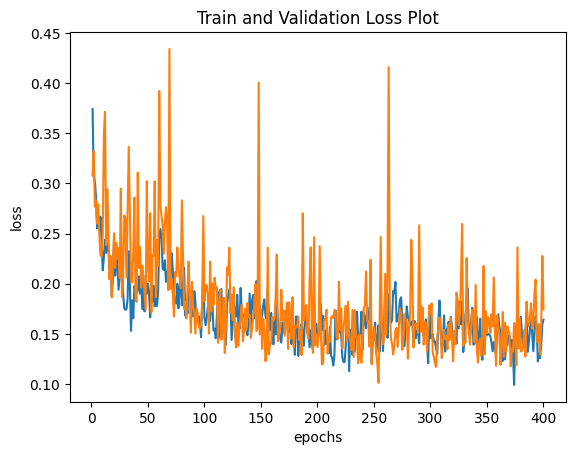

In [ ]:
import matplotlib.pyplot as plt
with torch.no_grad():
  plt.plot(range(1,epochs+1), train_mean_losses)
  plt.plot(range(1,epochs+1), valid_mean_losses)
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.title('Train and Validation Loss Plot')
  plt.show()

In [ ]:
net.load_state_dict(torch.load("best_model.pth"))

<All keys matched successfully>

In [ ]:
test_predictions = np.empty((0,2))
with torch.no_grad():
    for iteration, batch_data in enumerate(test_loader):
        X_batch, y_batch = batch_data        
        out = net(X_batch)
        
        test_predictions = np.append(test_predictions, out.numpy(), 
                                     axis=0)
        

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

test_predictions = np.array(test_predictions)
test_predictions = np.argmax(np.array(test_predictions), axis=1)

print("=========================================================\n")
print("Predicted Class:")
print(test_predictions)
print("\nGround Truth:")
print(test_y)

print("\n=========================================================\n")
print("Confusion Matrix:")
print(confusion_matrix(test_y, test_predictions))

print("\n=========================================================\n")
accuracy = accuracy_score(test_y, test_predictions)
print("Accuracy: {}".format(accuracy))

f1 = f1_score(test_y, test_predictions, average='macro')
print("F1 Score: ", f1)

print("\n=========================================================\n")
print("Classification Report:")
print(classification_report(test_y, test_predictions))


Predicted Class:
[1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1
 0 1 1 0 1 0 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 1 0
 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1
 0 0 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1 0 1 0 0 1]

Ground Truth:
[1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1
 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1]


Confusion Matrix:
[[48  4]
 [12 70]]


Accuracy: 0.8805970149253731
F1 Score:  0.8772893772893773


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        52
           1       0.95      0.85      0.90        82

    accuracy                           0.88       134
   macro avg       0.87      0.89      0.88       134
weighted avg       0.89 

# Modifikasi Arsitektur 5


*   Hidden layer berjumlah 3, dengan jumlah neuron di masing-masing hidden layer sebanyak 15 neuron
*   Optimasi yang digunakan adalah SGD dengan learning rate=0.19
*   Epoch sebanyak 300

In [ ]:
#bikin object model
class Net(nn.Module):
    # define nn
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(6, 15)
        self.bn1 = nn.BatchNorm1d(15)
        
        self.fc2 = nn.Linear(15, 15) 
        self.bn2 = nn.BatchNorm1d(15)

        self.fc3 = nn.Linear(15, 15)
        self.bn3 = nn.BatchNorm1d(15)
        
        self.fc4 = nn.Linear(15, 2) 
#total ada 2 hidden layer.

    def forward(self, X):
        X = self.fc1(X) 
        X = F.relu(X)
        X = self.bn1(X) 
        X = self.fc2(X)
        X = F.relu(X)
        X = self.bn2(X)
        X = self.fc3(X)
        X = F.relu(X)
        X = self.bn3(X)
        X = self.fc4(X)

        return X

In [ ]:
# Instantiating the model
net = Net() 

# Choosing the loss function
criterion = nn.CrossEntropyLoss() 

# Choosing the optimizer
optimizer = torch.optim.SGD(net.parameters(), lr=0.19) 

In [ ]:
epochs = 300 #jumlah epoch 300 epoch
 
train_mean_losses = []
valid_mean_losses = []

valid_best_loss = np.inf

for i in range(epochs):  
    #===============================================================
    # training 
    train_losses = []
    
    print("=========================================================")
    print("Epoch {}".format(i))
    
    for iteration, batch_data in enumerate(train_loader):
        X_batch, y_batch = batch_data
        
        optimizer.zero_grad()
        
        out = net(X_batch)
        loss = criterion(out, y_batch.squeeze())
        
        loss.backward()   # perhitungan backpropargation
        optimizer.step()
        
        train_losses.append(loss)  
    
    train_mean_loss = torch.mean(torch.stack(train_losses))
    print('training loss: {:10.8f}'.format(train_mean_loss))
    
    train_mean_losses.append(train_mean_loss)
    
    #===============================================================
    valid_losses = []
    with torch.set_grad_enabled(False):
        for iteration, batch_data in enumerate(valid_loader):
            X_batch, y_batch = batch_data

            out = net(X_batch)
            loss = criterion(out, y_batch.squeeze())
            valid_losses.append(loss)
            
        valid_mean_loss = torch.mean(torch.stack(valid_losses))
        print('validation loss: {:10.8f}'.format(valid_mean_loss))
        
        valid_mean_losses.append(valid_mean_loss)
        
        if valid_mean_loss.cpu().numpy()[()] < valid_best_loss:
            valid_best_loss = valid_mean_loss
            torch.save(net.state_dict(), "best_model.pth")
            best_epoch = i
    #===============================================================

Epoch 0
training loss: 0.37256804
validation loss: 0.38687730
Epoch 1
training loss: 0.32004088
validation loss: 0.25632206
Epoch 2
training loss: 0.28118587
validation loss: 0.27173778
Epoch 3
training loss: 0.27382922
validation loss: 0.22110866
Epoch 4
training loss: 0.25908169
validation loss: 0.19021641
Epoch 5
training loss: 0.24547933
validation loss: 0.22961809
Epoch 6
training loss: 0.21480691
validation loss: 0.24474949
Epoch 7
training loss: 0.22227636
validation loss: 0.20646983
Epoch 8
training loss: 0.24252160
validation loss: 0.22378765
Epoch 9
training loss: 0.23466691
validation loss: 0.31572807
Epoch 10
training loss: 0.23101024
validation loss: 0.24801528
Epoch 11
training loss: 0.22359836
validation loss: 0.20069104
Epoch 12
training loss: 0.24188456
validation loss: 0.26562104
Epoch 13
training loss: 0.18574044
validation loss: 0.17616317
Epoch 14
training loss: 0.22973637
validation loss: 0.22465648
Epoch 15
training loss: 0.21678613
validation loss: 0.20467794
Ep

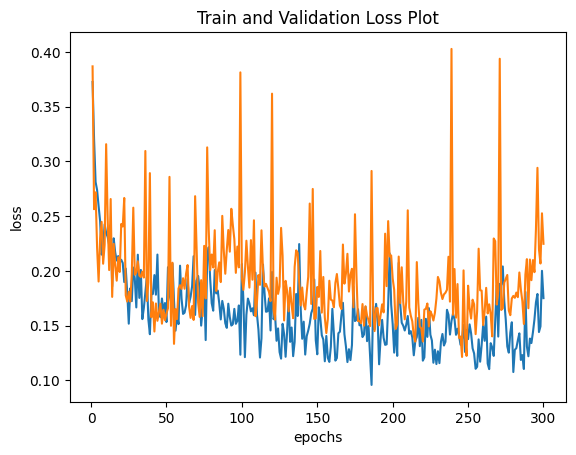

In [ ]:
import matplotlib.pyplot as plt
with torch.no_grad():
  plt.plot(range(1,epochs+1), train_mean_losses)
  plt.plot(range(1,epochs+1), valid_mean_losses)
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.title('Train and Validation Loss Plot')
  plt.show()

In [ ]:
net.load_state_dict(torch.load("best_model.pth"))

<All keys matched successfully>

In [ ]:
test_predictions = np.empty((0,2))
with torch.no_grad():
    for iteration, batch_data in enumerate(test_loader):
        X_batch, y_batch = batch_data        
        out = net(X_batch)
        
        test_predictions = np.append(test_predictions, out.numpy(), 
                                     axis=0)
        

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

test_predictions = np.array(test_predictions)
test_predictions = np.argmax(np.array(test_predictions), axis=1)

print("=========================================================\n")
print("Predicted Class:")
print(test_predictions)
print("\nGround Truth:")
print(test_y)

print("\n=========================================================\n")
print("Confusion Matrix:")
print(confusion_matrix(test_y, test_predictions))

print("\n=========================================================\n")
accuracy = accuracy_score(test_y, test_predictions)
print("Accuracy: {}".format(accuracy))

f1 = f1_score(test_y, test_predictions, average='macro')
print("F1 Score: ", f1)

print("\n=========================================================\n")
print("Classification Report:")
print(classification_report(test_y, test_predictions))


Predicted Class:
[1 1 1 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1
 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0
 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1
 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1]

Ground Truth:
[1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1
 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1]


Confusion Matrix:
[[48  4]
 [ 9 73]]


Accuracy: 0.9029850746268657
F1 Score:  0.8994864693324102


Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88        52
           1       0.95      0.89      0.92        82

    accuracy                           0.90       134
   macro avg       0.90      0.91      0.90       134
weighted avg       0.91 

# Modifikasi Arsitektur 6


*   Hidden layer berjumlah 4, dengan jumlah neuron di masing-masing hidden layer sebanyak 15 neuron
*   Optimasi yang digunakan adalah SGD dengan learning rate=0.1
*   Epoch sebanyak 300

In [ ]:
#bikin object model
class Net(nn.Module):
    # define nn
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(6, 15) 
        self.bn1 = nn.BatchNorm1d(15)
        
        self.fc2 = nn.Linear(15, 15)
        self.bn2 = nn.BatchNorm1d(15)

        self.fc3 = nn.Linear(15, 15)
        self.bn3 = nn.BatchNorm1d(15)

        self.fc4 = nn.Linear(15, 15)
        self.bn4 = nn.BatchNorm1d(15)
        
        self.fc5 = nn.Linear(15, 2) 
#total ada 2 hidden layer.

    def forward(self, X):
        X = self.fc1(X)
        X = F.relu(X)
        X = self.bn1(X) 
        X = self.fc2(X)
        X = F.relu(X)
        X = self.bn2(X)
        X = self.fc3(X)
        X = F.relu(X)
        X = self.bn3(X)
        X = self.fc4(X)
        X = F.relu(X)
        X = self.bn4(X)
        X = self.fc5(X)

        return X

In [ ]:
# Instantiating the model
net = Net() 

# Choosing the loss function
criterion = nn.CrossEntropyLoss() 

# Choosing the optimizer
optimizer = torch.optim.SGD(net.parameters(), lr=0.1) 

In [ ]:
epochs = 300 
 
train_mean_losses = []
valid_mean_losses = []

valid_best_loss = np.inf

for i in range(epochs):  
    #===============================================================
    # training 
    train_losses = []
    
    print("=========================================================")
    print("Epoch {}".format(i))
    
    for iteration, batch_data in enumerate(train_loader):
        X_batch, y_batch = batch_data
        
        optimizer.zero_grad()
        
        out = net(X_batch)
        loss = criterion(out, y_batch.squeeze())
        
        loss.backward()   # perhitungan backpropargation
        optimizer.step()
        
        train_losses.append(loss)   #memperbaharui setiao weight atau bbobot
    
    train_mean_loss = torch.mean(torch.stack(train_losses))
    print('training loss: {:10.8f}'.format(train_mean_loss))
    
    train_mean_losses.append(train_mean_loss)
    
    #===============================================================
    # validation#setiap epoch lakukan validation
    valid_losses = []
    with torch.set_grad_enabled(False):
        for iteration, batch_data in enumerate(valid_loader):
            X_batch, y_batch = batch_data

            out = net(X_batch)
            loss = criterion(out, y_batch.squeeze())
            valid_losses.append(loss)
            
        valid_mean_loss = torch.mean(torch.stack(valid_losses))
        print('validation loss: {:10.8f}'.format(valid_mean_loss))
        
        valid_mean_losses.append(valid_mean_loss)
        
        if valid_mean_loss.cpu().numpy()[()] < valid_best_loss:
            valid_best_loss = valid_mean_loss
            torch.save(net.state_dict(), "best_model.pth")
            best_epoch = i
    #===============================================================

Epoch 0
training loss: 0.41000202
validation loss: 0.41421187
Epoch 1
training loss: 0.32861048
validation loss: 0.34127921
Epoch 2
training loss: 0.29459330
validation loss: 0.32178760
Epoch 3
training loss: 0.30003858
validation loss: 0.25492510
Epoch 4
training loss: 0.29258028
validation loss: 0.30173314
Epoch 5
training loss: 0.26084867
validation loss: 0.27672815
Epoch 6
training loss: 0.27489704
validation loss: 0.30149141
Epoch 7
training loss: 0.26879305
validation loss: 0.24167413
Epoch 8
training loss: 0.26282719
validation loss: 0.30967695
Epoch 9
training loss: 0.24591576
validation loss: 0.26956719
Epoch 10
training loss: 0.23728745
validation loss: 0.23829244
Epoch 11
training loss: 0.23063949
validation loss: 0.21752004
Epoch 12
training loss: 0.22564307
validation loss: 0.21308210
Epoch 13
training loss: 0.22513333
validation loss: 0.58353817
Epoch 14
training loss: 0.30088076
validation loss: 0.25780571
Epoch 15
training loss: 0.26247835
validation loss: 0.23177774
Ep

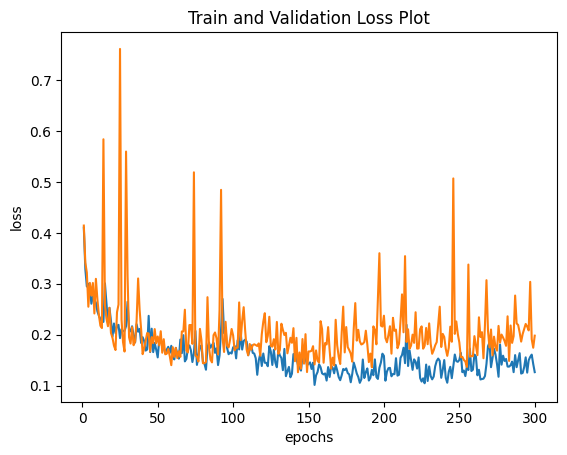

In [ ]:
import matplotlib.pyplot as plt
with torch.no_grad():
  plt.plot(range(1,epochs+1), train_mean_losses)
  plt.plot(range(1,epochs+1), valid_mean_losses)
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.title('Train and Validation Loss Plot')
  plt.show()

In [ ]:
net.load_state_dict(torch.load("best_model.pth"))

<All keys matched successfully>

In [ ]:
test_predictions = np.empty((0,2))
with torch.no_grad():
    for iteration, batch_data in enumerate(test_loader):
        X_batch, y_batch = batch_data        
        out = net(X_batch)
        
        test_predictions = np.append(test_predictions, out.numpy(), 
                                     axis=0)
        

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

test_predictions = np.array(test_predictions)
test_predictions = np.argmax(np.array(test_predictions), axis=1)

print("=========================================================\n")
print("Predicted Class:")
print(test_predictions)
print("\nGround Truth:")
print(test_y)

print("\n=========================================================\n")
print("Confusion Matrix:")
print(confusion_matrix(test_y, test_predictions))

print("\n=========================================================\n")
accuracy = accuracy_score(test_y, test_predictions)
print("Accuracy: {}".format(accuracy))

f1 = f1_score(test_y, test_predictions, average='macro')
print("F1 Score: ", f1)

print("\n=========================================================\n")
print("Classification Report:")
print(classification_report(test_y, test_predictions))


Predicted Class:
[1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1
 0 1 1 0 1 1 1 0 1 0 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 1 0 1 0 0 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1
 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1]

Ground Truth:
[1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1
 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1]


Confusion Matrix:
[[49  3]
 [ 7 75]]


Accuracy: 0.9253731343283582
F1 Score:  0.9224537037037037


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        52
           1       0.96      0.91      0.94        82

    accuracy                           0.93       134
   macro avg       0.92      0.93      0.92       134
weighted avg       0.93 

# Modifikasi Arsitektur 7


*   Hidden layer berjumlah 1, dengan jumlah neuron 30
*   Optimasi yang digunakan adalah Adam dengan learning rate=0.09
*   Epoch sebanyak 300

In [ ]:
#bikin object model
class Net(nn.Module):
    # define nn
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(6, 30) 
        self.bn1 = nn.BatchNorm1d(30)
        
        self.fc2= nn.Linear(30, 2)
#total ada 2 hidden layer.

    def forward(self, X):
        X = self.fc1(X)
        X = F.relu(X)
        X = self.bn1(X)
        X = self.fc2(X)

        return X

In [ ]:
# Instantiating the model
net = Net() 

# Choosing the loss function
criterion = nn.CrossEntropyLoss()

# Choosing the optimizer
optimizer = torch.optim.Adam(net.parameters(), lr=0.09) 

In [ ]:
epochs = 300 
 
train_mean_losses = []
valid_mean_losses = []

valid_best_loss = np.inf

for i in range(epochs):  
    #===============================================================
    # training 
    train_losses = []
    
    print("=========================================================")
    print("Epoch {}".format(i))
    
    for iteration, batch_data in enumerate(train_loader):
        X_batch, y_batch = batch_data
        
        optimizer.zero_grad()
        
        out = net(X_batch)
        loss = criterion(out, y_batch.squeeze())
        
        loss.backward()  
        optimizer.step()
        
        train_losses.append(loss) 
    
    train_mean_loss = torch.mean(torch.stack(train_losses))
    print('training loss: {:10.8f}'.format(train_mean_loss))
    
    train_mean_losses.append(train_mean_loss)
    
    #===============================================================

    valid_losses = []
    with torch.set_grad_enabled(False):
        for iteration, batch_data in enumerate(valid_loader):
            X_batch, y_batch = batch_data

            out = net(X_batch)
            loss = criterion(out, y_batch.squeeze())
            valid_losses.append(loss)
            
        valid_mean_loss = torch.mean(torch.stack(valid_losses))
        print('validation loss: {:10.8f}'.format(valid_mean_loss))
        
        valid_mean_losses.append(valid_mean_loss)
        
        if valid_mean_loss.cpu().numpy()[()] < valid_best_loss:
            valid_best_loss = valid_mean_loss
            torch.save(net.state_dict(), "best_model.pth")
            best_epoch = i
    #===============================================================

Epoch 0
training loss: 0.46405444
validation loss: 0.26669800
Epoch 1
training loss: 0.33381635
validation loss: 0.32636827
Epoch 2
training loss: 0.34517238
validation loss: 0.39976457
Epoch 3
training loss: 0.35501701
validation loss: 0.35991490
Epoch 4
training loss: 0.32806626
validation loss: 0.33645666
Epoch 5
training loss: 0.37738141
validation loss: 0.39230630
Epoch 6
training loss: 0.38633084
validation loss: 0.30273533
Epoch 7
training loss: 0.32223630
validation loss: 0.30017030
Epoch 8
training loss: 0.39256513
validation loss: 0.26582858
Epoch 9
training loss: 0.34419391
validation loss: 0.41484013
Epoch 10
training loss: 0.32867810
validation loss: 0.29081145
Epoch 11
training loss: 0.30407995
validation loss: 0.27355367
Epoch 12
training loss: 0.30928802
validation loss: 0.26326886
Epoch 13
training loss: 0.28858083
validation loss: 0.31837407
Epoch 14
training loss: 0.31093499
validation loss: 0.28376210
Epoch 15
training loss: 0.35326481
validation loss: 0.44320911
Ep

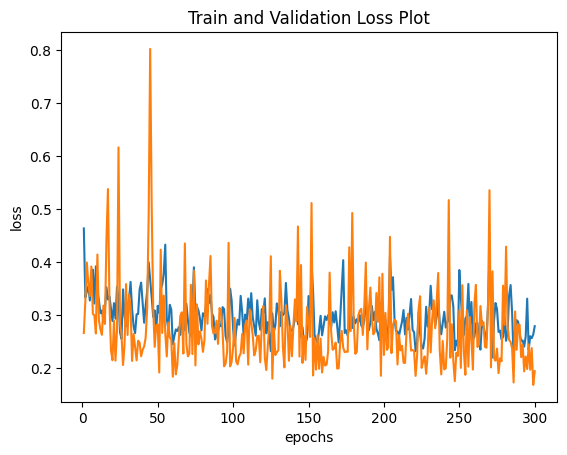

In [ ]:
import matplotlib.pyplot as plt
with torch.no_grad():
  plt.plot(range(1,epochs+1), train_mean_losses)
  plt.plot(range(1,epochs+1), valid_mean_losses)
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.title('Train and Validation Loss Plot')
  plt.show()

In [ ]:
net.load_state_dict(torch.load("best_model.pth"))

<All keys matched successfully>

In [ ]:
test_predictions = np.empty((0,2))
with torch.no_grad():
    for iteration, batch_data in enumerate(test_loader):
        X_batch, y_batch = batch_data        
        out = net(X_batch)
        
        test_predictions = np.append(test_predictions, out.numpy(), 
                                     axis=0)
        

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

test_predictions = np.array(test_predictions)
test_predictions = np.argmax(np.array(test_predictions), axis=1)

print("=========================================================\n")
print("Predicted Class:")
print(test_predictions)
print("\nGround Truth:")
print(test_y)

print("\n=========================================================\n")
print("Confusion Matrix:")
print(confusion_matrix(test_y, test_predictions))

print("\n=========================================================\n")
accuracy = accuracy_score(test_y, test_predictions)
print("Accuracy: {}".format(accuracy))

f1 = f1_score(test_y, test_predictions, average='macro')
print("F1 Score: ", f1)

print("\n=========================================================\n")
print("Classification Report:")
print(classification_report(test_y, test_predictions))


Predicted Class:
[1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1
 0 1 1 0 1 0 1 0 1 1 1 0 0 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 0
 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 0
 0 0 1 0 1 0 0 0 1 0 0 1 0 1 0 1 0 1 0 1 0 0 1]

Ground Truth:
[1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1
 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1]


Confusion Matrix:
[[49  3]
 [14 68]]


Accuracy: 0.8731343283582089
F1 Score:  0.8705314009661835


Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.94      0.85        52
           1       0.96      0.83      0.89        82

    accuracy                           0.87       134
   macro avg       0.87      0.89      0.87       134
weighted avg       0.89 

# Modifikasi Arsitektur 8


*   Hidden layer berjumlah 2, dengan jumlah neuron di masing-masing hidden layer sebanyak 20 dan 16 neuron
*   Optimasi yang digunakan adalah Adam dengan learning rate=0.15
*   Epoch sebanyak 300

In [ ]:
#bikin object model
class Net(nn.Module):
    # define nn
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(6, 20) 
        self.bn1 = nn.BatchNorm1d(20)
        
        self.fc2 = nn.Linear(20, 16) 
        self.bn2 = nn.BatchNorm1d(16)
        
        self.fc3 = nn.Linear(16, 2) 
#total ada 2 hidden layer.


    def forward(self, X):
        X = self.fc1(X)
        X = F.relu(X)
        X = self.bn1(X) 
        X = self.fc2(X)
        X = F.relu(X)
        X = self.bn2(X)
        X = self.fc3(X)

        return X

In [ ]:
# Instantiating the model
net = Net() 

# Choosing the loss function
criterion = nn.CrossEntropyLoss()

# Choosing the optimizer
optimizer = torch.optim.Adam(net.parameters(), lr=0.15) 

In [ ]:
epochs = 300
 
train_mean_losses = []
valid_mean_losses = []

valid_best_loss = np.inf

for i in range(epochs):  
    #===============================================================
    # training 
    train_losses = []
    
    print("=========================================================")
    print("Epoch {}".format(i))
    
    for iteration, batch_data in enumerate(train_loader):
        X_batch, y_batch = batch_data
        
        optimizer.zero_grad()
        
        out = net(X_batch)
        loss = criterion(out, y_batch.squeeze())
        
        loss.backward() 
        optimizer.step()
        
        train_losses.append(loss)  
    
    train_mean_loss = torch.mean(torch.stack(train_losses))
    print('training loss: {:10.8f}'.format(train_mean_loss))
    
    train_mean_losses.append(train_mean_loss)
    
    #===============================================================

    valid_losses = []
    with torch.set_grad_enabled(False):
        for iteration, batch_data in enumerate(valid_loader):
            X_batch, y_batch = batch_data

            out = net(X_batch)
            loss = criterion(out, y_batch.squeeze())
            valid_losses.append(loss)
            
        valid_mean_loss = torch.mean(torch.stack(valid_losses))
        print('validation loss: {:10.8f}'.format(valid_mean_loss))
        
        valid_mean_losses.append(valid_mean_loss)
        
        if valid_mean_loss.cpu().numpy()[()] < valid_best_loss:
            valid_best_loss = valid_mean_loss
            torch.save(net.state_dict(), "best_model.pth")
            best_epoch = i
    #===============================================================

Epoch 0
training loss: 0.45805734
validation loss: 0.32344127
Epoch 1
training loss: 0.37683550
validation loss: 0.28839469
Epoch 2
training loss: 0.32267123
validation loss: 0.31197897
Epoch 3
training loss: 0.29647771
validation loss: 0.28869748
Epoch 4
training loss: 0.30295277
validation loss: 0.23287442
Epoch 5
training loss: 0.31383115
validation loss: 0.27797902
Epoch 6
training loss: 0.32247001
validation loss: 0.29425615
Epoch 7
training loss: 0.32779646
validation loss: 0.20789030
Epoch 8
training loss: 0.30837941
validation loss: 0.32970512
Epoch 9
training loss: 0.34555259
validation loss: 0.32365668
Epoch 10
training loss: 0.39088556
validation loss: 0.24934275
Epoch 11
training loss: 0.29266396
validation loss: 0.20178697
Epoch 12
training loss: 0.33653444
validation loss: 0.52950883
Epoch 13
training loss: 0.36761197
validation loss: 0.38612810
Epoch 14
training loss: 0.26379216
validation loss: 0.27895159
Epoch 15
training loss: 0.29311702
validation loss: 0.22597244
Ep

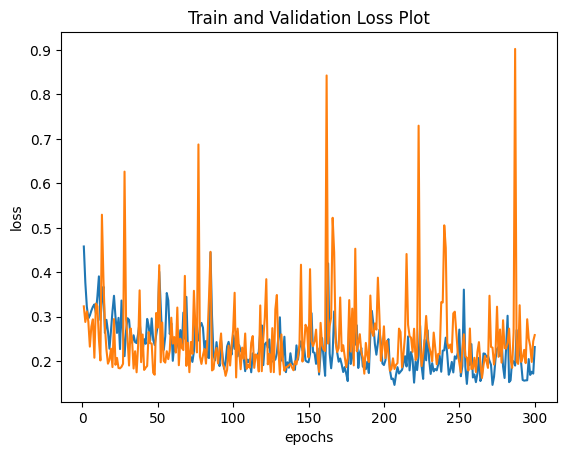

In [ ]:
import matplotlib.pyplot as plt
with torch.no_grad():
  plt.plot(range(1,epochs+1), train_mean_losses)
  plt.plot(range(1,epochs+1), valid_mean_losses)
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.title('Train and Validation Loss Plot')
  plt.show()

In [ ]:
net.load_state_dict(torch.load("best_model.pth"))

<All keys matched successfully>

In [ ]:
test_predictions = np.empty((0,2))
with torch.no_grad():
    for iteration, batch_data in enumerate(test_loader):
        X_batch, y_batch = batch_data        
        out = net(X_batch)
        
        test_predictions = np.append(test_predictions, out.numpy(), 
                                     axis=0)
        

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

test_predictions = np.array(test_predictions)
test_predictions = np.argmax(np.array(test_predictions), axis=1)

print("=========================================================\n")
print("Predicted Class:")
print(test_predictions)
print("\nGround Truth:")
print(test_y)

print("\n=========================================================\n")
print("Confusion Matrix:")
print(confusion_matrix(test_y, test_predictions))

print("\n=========================================================\n")
accuracy = accuracy_score(test_y, test_predictions)
print("Accuracy: {}".format(accuracy))

f1 = f1_score(test_y, test_predictions, average='macro')
print("F1 Score: ", f1)

print("\n=========================================================\n")
print("Classification Report:")
print(classification_report(test_y, test_predictions))


Predicted Class:
[1 1 1 0 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1
 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1
 0 1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 0 1 0 1 0 0 1]

Ground Truth:
[1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1
 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1]


Confusion Matrix:
[[48  4]
 [11 71]]


Accuracy: 0.8880597014925373
F1 Score:  0.8846617317954898


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.92      0.86        52
           1       0.95      0.87      0.90        82

    accuracy                           0.89       134
   macro avg       0.88      0.89      0.88       134
weighted avg       0.90 

# Modifikasi Arsitektur 9


*   Hidden layer berjumlah 2, dengan jumlah neuron di masing-masing hidden layer sebanyak 16 dan 10 neuron
*   Optimasi yang digunakan adalah SGD dengan learning rate=0.15
*   Epoch sebanyak 300

In [ ]:
#bikin object model
class Net(nn.Module):
    # define nn
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(6, 12) 
        self.bn1 = nn.BatchNorm1d(12)
        
        self.fc2 = nn.Linear(12, 10) 
        self.bn2 = nn.BatchNorm1d(10)
        
        self.fc3 = nn.Linear(10, 2) 

    def forward(self, X):
        X = self.fc1(X) 
        X = F.relu(X)
        X = self.bn1(X) 
        X = self.fc2(X)
        X = F.relu(X)
        X = self.bn2(X)
        X = self.fc3(X)

        return X

In [ ]:
# Instantiating the model
net = Net() 

# Choosing the loss function
criterion = nn.CrossEntropyLoss()

# Choosing the optimizer
optimizer = torch.optim.SGD(net.parameters(), lr=0.15) 

In [ ]:
epochs = 300 #jumlah epoch 300 epoch
 
train_mean_losses = []
valid_mean_losses = []

valid_best_loss = np.inf

for i in range(epochs):  
    #===============================================================
    # training 
    train_losses = []
    
    print("=========================================================")
    print("Epoch {}".format(i))
    
    for iteration, batch_data in enumerate(train_loader):
        X_batch, y_batch = batch_data
        
        optimizer.zero_grad()
        
        out = net(X_batch)
        loss = criterion(out, y_batch.squeeze())
        
        loss.backward()   # perhitungan backpropargation
        optimizer.step()
        
        train_losses.append(loss)   
    
    train_mean_loss = torch.mean(torch.stack(train_losses))
    print('training loss: {:10.8f}'.format(train_mean_loss))
    
    train_mean_losses.append(train_mean_loss)
    
    #===============================================================

    valid_losses = []
    with torch.set_grad_enabled(False):
        for iteration, batch_data in enumerate(valid_loader):
            X_batch, y_batch = batch_data

            out = net(X_batch)
            loss = criterion(out, y_batch.squeeze())
            valid_losses.append(loss)
            
        valid_mean_loss = torch.mean(torch.stack(valid_losses))
        print('validation loss: {:10.8f}'.format(valid_mean_loss))
        
        valid_mean_losses.append(valid_mean_loss)
        
        if valid_mean_loss.cpu().numpy()[()] < valid_best_loss:
            valid_best_loss = valid_mean_loss
            torch.save(net.state_dict(), "best_model.pth")
            best_epoch = i
    #===============================================================

Epoch 0
training loss: 0.35541326
validation loss: 0.33083951
Epoch 1
training loss: 0.31579432
validation loss: 0.31301063
Epoch 2
training loss: 0.29306239
validation loss: 0.33509660
Epoch 3
training loss: 0.27158797
validation loss: 0.29586449
Epoch 4
training loss: 0.26403874
validation loss: 0.34605762
Epoch 5
training loss: 0.24469684
validation loss: 0.22305478
Epoch 6
training loss: 0.22456741
validation loss: 0.33889365
Epoch 7
training loss: 0.25552180
validation loss: 0.29682738
Epoch 8
training loss: 0.23764479
validation loss: 0.28202114
Epoch 9
training loss: 0.24117757
validation loss: 0.25868076
Epoch 10
training loss: 0.25174838
validation loss: 0.25983050
Epoch 11
training loss: 0.20994118
validation loss: 0.24539414
Epoch 12
training loss: 0.21261437
validation loss: 0.32874644
Epoch 13
training loss: 0.23239817
validation loss: 0.42980272
Epoch 14
training loss: 0.24325289
validation loss: 0.22933100
Epoch 15
training loss: 0.19857654
validation loss: 0.21779528
Ep

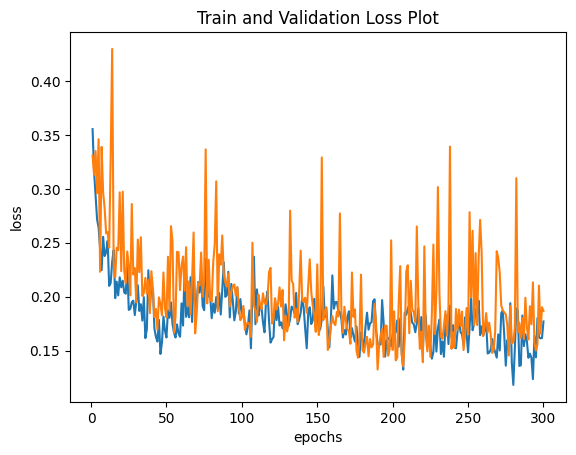

In [ ]:
import matplotlib.pyplot as plt
with torch.no_grad():
  plt.plot(range(1,epochs+1), train_mean_losses)
  plt.plot(range(1,epochs+1), valid_mean_losses)
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.title('Train and Validation Loss Plot')
  plt.show()

In [ ]:
net.load_state_dict(torch.load("best_model.pth"))

<All keys matched successfully>

In [ ]:
test_predictions = np.empty((0,2))
with torch.no_grad():
    for iteration, batch_data in enumerate(test_loader):
        X_batch, y_batch = batch_data        
        out = net(X_batch)
        
        test_predictions = np.append(test_predictions, out.numpy(), 
                                     axis=0)
        

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

test_predictions = np.array(test_predictions)
test_predictions = np.argmax(np.array(test_predictions), axis=1)

print("=========================================================\n")
print("Predicted Class:")
print(test_predictions)
print("\nGround Truth:")
print(test_y)

print("\n=========================================================\n")
print("Confusion Matrix:")
print(confusion_matrix(test_y, test_predictions))

print("\n=========================================================\n")
accuracy = accuracy_score(test_y, test_predictions)
print("Accuracy: {}".format(accuracy))

f1 = f1_score(test_y, test_predictions, average='macro')
print("F1 Score: ", f1)

print("\n=========================================================\n")
print("Classification Report:")
print(classification_report(test_y, test_predictions))


Predicted Class:
[1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1 0 1 1 0 0 1
 0 1 1 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 1 0 1 0 0 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1
 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1]

Ground Truth:
[1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1
 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1]


Confusion Matrix:
[[48  4]
 [ 8 74]]


Accuracy: 0.9104477611940298
F1 Score:  0.9069444444444444


Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.92      0.89        52
           1       0.95      0.90      0.92        82

    accuracy                           0.91       134
   macro avg       0.90      0.91      0.91       134
weighted avg       0.91 

# Modifikasi Arsitektur 10

In [ ]:
#bikin object model
class Net(nn.Module):
    # define nn
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(6, 16) 
        self.bn1 = nn.BatchNorm1d(16)
        
        self.fc2 = nn.Linear(16, 15) 
        self.bn2 = nn.BatchNorm1d(15)

        self.fc3 = nn.Linear(15, 2) 
#total ada 2 hidden layer.


#arsitektur, model yg kita rancang
    def forward(self, X):
        X = self.fc1(X) 
        X = F.relu(X)
        X = self.bn1(X) 
        X = self.fc2(X)
        X = F.relu(X)
        X = self.bn2(X)
        X = self.fc3(X)

        return X

In [ ]:
# Instantiating the model
net = Net() 

# Choosing the loss function
criterion = nn.CrossEntropyLoss()

# Choosing the optimizer
optimizer = torch.optim.Adam(net.parameters(), lr=0.1) 

In [ ]:
epochs = 300 #jumlah epoch 300 epoch
 
train_mean_losses = []
valid_mean_losses = []

valid_best_loss = np.inf

for i in range(epochs):  
    #===============================================================
    # training 
    train_losses = []
    
    print("=========================================================")
    print("Epoch {}".format(i))
    
    for iteration, batch_data in enumerate(train_loader):
        X_batch, y_batch = batch_data
        
        optimizer.zero_grad()
        
        out = net(X_batch)
        loss = criterion(out, y_batch.squeeze())
        
        loss.backward()   # perhitungan backpropargation
        optimizer.step()
        
        train_losses.append(loss)   
    
    train_mean_loss = torch.mean(torch.stack(train_losses))
    print('training loss: {:10.8f}'.format(train_mean_loss))
    
    train_mean_losses.append(train_mean_loss)
    
    #===============================================================
    # validation
    valid_losses = []
    with torch.set_grad_enabled(False):
        for iteration, batch_data in enumerate(valid_loader):
            X_batch, y_batch = batch_data

            out = net(X_batch)
            loss = criterion(out, y_batch.squeeze())
            valid_losses.append(loss)
            
        valid_mean_loss = torch.mean(torch.stack(valid_losses))
        print('validation loss: {:10.8f}'.format(valid_mean_loss))
        
        valid_mean_losses.append(valid_mean_loss)
        
        if valid_mean_loss.cpu().numpy()[()] < valid_best_loss:
            valid_best_loss = valid_mean_loss
            torch.save(net.state_dict(), "best_model.pth")
            best_epoch = i
    #===============================================================

Epoch 0
training loss: 0.40754279
validation loss: 0.30149242
Epoch 1
training loss: 0.36215058
validation loss: 0.31497428
Epoch 2
training loss: 0.31999651
validation loss: 0.24184313
Epoch 3
training loss: 0.33650741
validation loss: 0.26413611
Epoch 4
training loss: 0.30679432
validation loss: 0.25332329
Epoch 5
training loss: 0.34443983
validation loss: 0.34133613
Epoch 6
training loss: 0.31563655
validation loss: 0.24156950
Epoch 7
training loss: 0.32066548
validation loss: 0.25516838
Epoch 8
training loss: 0.28746343
validation loss: 0.26820970
Epoch 9
training loss: 0.25764126
validation loss: 0.22920804
Epoch 10
training loss: 0.25867307
validation loss: 0.24999332
Epoch 11
training loss: 0.26011854
validation loss: 0.25434983
Epoch 12
training loss: 0.26719576
validation loss: 0.23914656
Epoch 13
training loss: 0.29991394
validation loss: 0.25889042
Epoch 14
training loss: 0.26652509
validation loss: 0.27643853
Epoch 15
training loss: 0.24620023
validation loss: 0.22007044
Ep

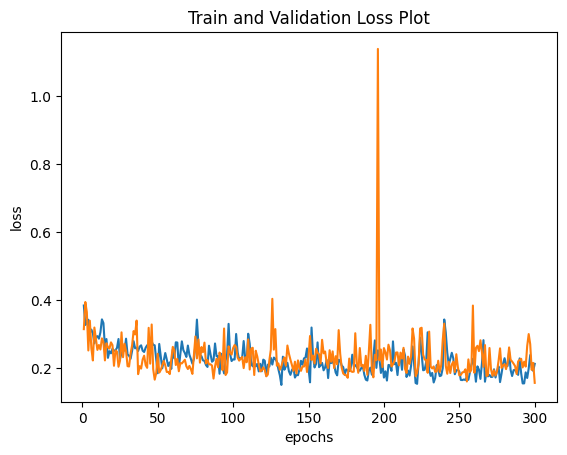

In [ ]:
import matplotlib.pyplot as plt
with torch.no_grad():
  plt.plot(range(1,epochs+1), train_mean_losses)
  plt.plot(range(1,epochs+1), valid_mean_losses)
  plt.xlabel('epochs')
  plt.ylabel('loss')
  plt.title('Train and Validation Loss Plot')
  plt.ylim([0, 0.7])
  plt.show()

In [ ]:
net.load_state_dict(torch.load("best_model.pth"))

<All keys matched successfully>

In [ ]:
test_predictions = np.empty((0,2))
with torch.no_grad():
    for iteration, batch_data in enumerate(test_loader):
        X_batch, y_batch = batch_data        
        out = net(X_batch)
        
        test_predictions = np.append(test_predictions, out.numpy(), 
                                     axis=0)
        

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

test_predictions = np.array(test_predictions)
test_predictions = np.argmax(np.array(test_predictions), axis=1)

print("=========================================================\n")
print("Predicted Class:")
print(test_predictions)
print("\nGround Truth:")
print(test_y)

print("\n=========================================================\n")
print("Confusion Matrix:")
print(confusion_matrix(test_y, test_predictions))

print("\n=========================================================\n")
accuracy = accuracy_score(test_y, test_predictions)
print("Accuracy: {}".format(accuracy))

f1 = f1_score(test_y, test_predictions, average='macro')
print("F1 Score: ", f1)

print("\n=========================================================\n")
print("Classification Report:")
print(classification_report(test_y, test_predictions))


Predicted Class:
[1 1 1 0 0 1 1 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 0 1 0 0 1 0 1 1 0 0 1
 0 1 1 0 1 0 1 0 1 0 1 0 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 1 0 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 0 0 1 1
 0 0 1 0 1 0 0 0 1 1 0 1 0 1 0 1 0 1 1 1 0 0 1]

Ground Truth:
[1 1 1 0 0 1 1 1 1 1 0 1 0 0 1 0 0 0 1 1 1 1 1 1 1 0 1 1 0 0 1 0 1 1 1 0 1
 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0
 1 1 0 1 0 1 1 0 0 1 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1 0 1 1 0 1 1 1 0 1 0 1 1
 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1]


Confusion Matrix:
[[49  3]
 [ 7 75]]


Accuracy: 0.9253731343283582
F1 Score:  0.9224537037037037


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.94      0.91        52
           1       0.96      0.91      0.94        82

    accuracy                           0.93       134
   macro avg       0.92      0.93      0.92       134
weighted avg       0.93 